# Credit Card Fraud Detection: Capstone Project

  ### Biplab Mondal | Jobish Jose | Lisna Paleri

## Probelm Statement

Develop a machine learning model for credit card fraud detection using historical transactional data. The model aims to reduce losses incurred by the bank due to fraudulent transactions by accurately identifying suspicious activities. Upon deployment, the bank plans to implement a second layer of authentication for flagged transactions. The objective is to compare the costs incurred before and after model deployment, factoring in both identified and undetected fraudulent transactions, to demonstrate the potential savings and benefits to the bank.

The dataset comprises credit card transactions from approximately 1,000 cardholders and involving a pool of 800 merchants, spanning from January 1, 2019, to December 31, 2020. It includes a total of 1,852,394 transactions, with 9,651 identified as fraudulent. The dataset is divided into two files:fraudTrain.csv and fraudTest.csv, which can be accessed and downloaded from the below link on Kaggle.

Link to download the datasets : https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [286]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.utils import shuffle


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import roc_auc_score

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)

# Enabling inline plotting for matplotlib
%matplotlib inline

# Setting formatting options for pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

# Setting plot style
plt.style.use('seaborn-darkgrid')

## Data Understanding and Feature Engineering

In [287]:
# Reading the training dataset from a CSV file named "fraudTrain.csv"
df_train = pd.read_csv("fraudTrain.csv") 

# Reading the testing dataset from a CSV file named "fraudTest.csv"
df_test = pd.read_csv("fraudTest.csv") 

In [288]:
# Inspecting the structure and contents of the training dataset
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [289]:
# Inspecting the structure and contents of the test dataset
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840000,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.280000,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.672900,-73.536500,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.050000,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.569700,-80.819100,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.190000,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.252900,-85.017000,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [290]:
# Printing the shape of the training and testing datasets to display the number of rows and columns
print("Shape of Training Data Set: ",df_train.shape)
print("Shape of Testing Data Set: ",df_test.shape)

Shape of Training Data Set:  (1296675, 23)
Shape of Testing Data Set:  (555719, 23)


The training dataset comprises 12,96,675 rows and 23 columns, while the test dataset consists of 5,55,719 rows and 23 columns.

In [291]:
# Displaying information about the training and testing datasets
print(" df_train\n")
df_train.info()
print("\n\n df_test\n")
df_test.info()

 df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long   

The datasets include transaction, individual, and merchant details, with a fraud indicator column. Most columns have appropriate data types. Datatype of 'trans_date_trans_time' column has to be changed to datetime.

In [292]:
# Counting the number of missing values in the training dataset
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [293]:
# Counting the number of missing values in the test dataset
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no missing values in both the training and testing datasets.

In [294]:
# Counting the number of duplicate rows in the training and testing datasets
print("Duplicate rows in training dataset: ",df_train.duplicated().sum())
print("Duplicate rows in testing dataset: ",df_test.duplicated().sum())

Duplicate rows in training dataset:  0
Duplicate rows in testing dataset:  0


There are no duplicate rows in either of the datasets.

In [295]:
# Converting the "trans_date_trans_time" column to datetime in the training and testing datasets
df_train["trans_date_trans_time"] = pd.to_datetime(df_train["trans_date_trans_time"])
df_test["trans_date_trans_time"] = pd.to_datetime(df_test["trans_date_trans_time"])

In [296]:
# Displaying information about the training and testing datasets
print(" df_train\n")
df_train.info()
print("\n\n df_test\n")
df_test.info()

 df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip              

Datatype of 'trans_date_trans_time' columns has been updated to datetime.

In [297]:
# Extracting the hour from the "trans_date_trans_time" column in the training dataset
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour

# Extracting the day of the week from the "trans_date_trans_time" column in the training dataset
df_train['day'] = df_train['trans_date_trans_time'].dt.day_name()

# Extracting the month from the "trans_date_trans_time" column in the training dataset
df_train['month'] = df_train['trans_date_trans_time'].dt.month

# Extracting the hour from the "trans_date_trans_time" column in the test dataset
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

# Extracting the day of the week from the "trans_date_trans_time" column in the test dataset
df_test['day'] = df_test['trans_date_trans_time'].dt.day_name()

# Extracting the month from the "trans_date_trans_time" column in the test dataset
df_test['month'] = df_test['trans_date_trans_time'].dt.month

In [298]:
# Displaying the first few rows of the training dataset to check for the new columns
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,1


In [299]:
# Displaying the first few rows of the test dataset to check for the new columns
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,6
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840000,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,6
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.280000,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.672900,-73.536500,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,6
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.050000,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.569700,-80.819100,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,6
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.190000,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.252900,-85.017000,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday,6


In [300]:
# Converting the 'dob' column to datetime in the training and testing datasets
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_test['dob'] = pd.to_datetime(df_test['dob'])

# Calculating age and creating a new column 'age' in the training and testing datasets
df_train['age'] = np.round((df_train['trans_date_trans_time'] - df_train['dob']) / np.timedelta64(1, 'D') / 365.25).astype(int)
df_test['age'] = np.round((df_test['trans_date_trans_time'] - df_test['dob']) / np.timedelta64(1, 'D') / 365.25).astype(int)

A new column 'age' has been added to both training and testing datasets. It calculates individuals' ages based on their date of birth ('dob') and transaction date ('trans_date_trans_time'). This enables straightforward analysis of age-related trends.


In [301]:
# Displaying the first few values of the 'age' column in both the datasets to inspect the calculated ages

print("df_train\n", df_train.age.head(), "\n\ndf_test\n", df_test.age.head(), sep="\n")

df_train

0    31
1    41
2    57
3    52
4    33
Name: age, dtype: int64


df_test

0    52
1    30
2    50
3    33
4    65
Name: age, dtype: int64


In [302]:
# Creating a function to calculate the distance between customer and merchant locations using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    
    # Converting latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Applying Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return (c * r).astype(int)

# Calculating distance between customer and merchant locations in the training dataset
df_train['distance_km'] = haversine(df_train['lat'], df_train['long'], df_train['merch_lat'], df_train['merch_long'])

# Calculating distance between customer and merchant locations in the test dataset
df_test['distance_km'] = haversine(df_test['lat'], df_test['long'], df_test['merch_lat'], df_test['merch_long'])

The `distance_km` feature calculates the geographical distance, in kilometers, between customers and merchants. It aids in assessing transaction proximity and detecting potential anomalies, such as transactions occurring over unusual distances, which could indicate fraudulent behavior.

In [303]:
# Displaying the first few rows of the training dataset to check for the 'distance_km' column
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,age,distance_km
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,1,31,78
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,1,41,30
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,1,57,108
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,1,52,95
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,1,33,77


In [304]:
# Displaying the first few rows of the test dataset to check for the 'distance_km' column
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,age,distance_km
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,6,52,24
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840000,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,6,30,104
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.280000,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.672900,-73.536500,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,6,50,59
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.050000,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.569700,-80.819100,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,6,33,27
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.190000,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.252900,-85.017000,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday,6,65,104


In [305]:
# Converting 'gender' column to binary classification
df_train['gender'] = df_train['gender'].map({'M': 1, 'F': 0})
df_test['gender'] = df_test['gender'].map({'M': 1, 'F': 0})

In [306]:
# Removing 'fraud_' prefix from the 'merchant' column in the training and testing datasets
df_train['merchant'] = df_train['merchant'].apply(lambda x : x.replace('fraud_',''))
df_test['merchant'] = df_test['merchant'].apply(lambda x : x.replace('fraud_',''))

In [307]:
# Displaying the first few rows of the updated training dataset to inspect its contents
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,age,distance_km
0,0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,1,31,78
1,1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,1,41,30
2,2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,1,57,108
3,3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,1,52,95
4,4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,1,33,77


In [308]:
# Displaying the first few rows of the updated test dataset to inspect its contents
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,age,distance_km
0,0,2020-06-21 12:14:25,2291163933867244,Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,1,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,6,52,24
1,1,2020-06-21 12:14:33,3573030041201292,Sporer-Keebler,personal_care,29.840000,Joanne,Williams,0,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,6,30,104
2,2,2020-06-21 12:14:53,3598215285024754,"Swaniawski, Nitzsche and Welch",health_fitness,41.280000,Ashley,Lopez,0,9333 Valentine Point,Bellmore,NY,11710,40.672900,-73.536500,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,6,50,59
3,3,2020-06-21 12:15:15,3591919803438423,Haley Group,misc_pos,60.050000,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.569700,-80.819100,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,6,33,27
4,4,2020-06-21 12:15:17,3526826139003047,Johnston-Casper,travel,3.190000,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.252900,-85.017000,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday,6,65,104


In [309]:
# Printing column names of training and testing datasets
print("Columns in df_train:")
print(df_train.columns)
print("\nColumns in df_test:")
print(df_test.columns)

Columns in df_train:
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day', 'month', 'age',
       'distance_km'],
      dtype='object')

Columns in df_test:
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day', 'month', 'age',
       'distance_km'],
      dtype='object')


In [310]:
# Removing redundant and less useful columns for further processing and model building from both the datasets
cols_to_drop =['Unnamed: 0','trans_date_trans_time','cc_num','first','last','street','zip',
               'lat','long','dob','trans_num','unix_time','merch_lat','merch_long']
df_train.drop(cols_to_drop, axis = 1, inplace = True)
df_test.drop(cols_to_drop, axis = 1, inplace = True)

In [311]:
# Moving the position of the 'is_fraud' column to the end of the datasets for better visibility
is_fraud_column_train = df_train.pop('is_fraud')
is_fraud_column_test = df_test.pop('is_fraud')
df_train['is_fraud'] = is_fraud_column_train
df_test['is_fraud'] = is_fraud_column_test

In [312]:
# Displaying the first few rows of the updated training dataset to inspect its contents
df_train.head()

,merchant,category,amt,gender,city,state,city_pop,job,hour,day,month,age,distance_km,is_fraud
0,"Rippin, Kub and Mann",misc_net,4.970000,0,Moravian Falls,NC,3495,"Psychologist, counselling",0,Tuesday,1,31,78,0
1,"Heller, Gutmann and Zieme",grocery_pos,107.230000,0,Orient,WA,149,Special educational needs teacher,0,Tuesday,1,41,30,0
2,Lind-Buckridge,entertainment,220.110000,1,Malad City,ID,4154,Nature conservation officer,0,Tuesday,1,57,108,0
3,"Kutch, Hermiston and Farrell",gas_transport,45.000000,1,Boulder,MT,1939,Patent attorney,0,Tuesday,1,52,95,0
4,Keeling-Crist,misc_pos,41.960000,1,Doe Hill,VA,99,Dance movement psychotherapist,0,Tuesday,1,33,77,0


In [313]:
# Displaying the first few rows of the updated test dataset to inspect its contents
df_test.head()

,merchant,category,amt,gender,city,state,city_pop,job,hour,day,month,age,distance_km,is_fraud
0,Kirlin and Sons,personal_care,2.860000,1,Columbia,SC,333497,Mechanical engineer,12,Sunday,6,52,24,0
1,Sporer-Keebler,personal_care,29.840000,0,Altonah,UT,302,"Sales professional, IT",12,Sunday,6,30,104,0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.280000,0,Bellmore,NY,34496,"Librarian, public",12,Sunday,6,50,59,0
3,Haley Group,misc_pos,60.050000,1,Titusville,FL,54767,Set designer,12,Sunday,6,33,27,0
4,Johnston-Casper,travel,3.190000,1,Falmouth,MI,1126,Furniture designer,12,Sunday,6,65,104,0


## Exploratory Data Analysis (EDA)

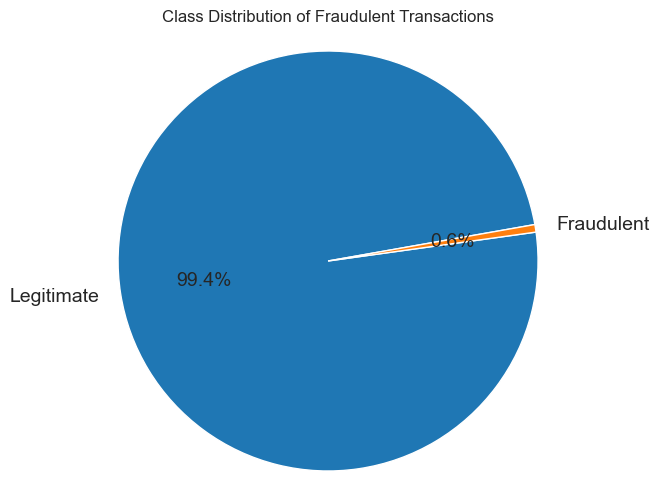

In [314]:
# Visualizing the class distribution to check for data imbalance between legitimate and fraudulent transactions
fraud_counts = df_train['is_fraud'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', startangle=10, textprops={'fontsize': 14})
plt.title('Class Distribution of Fraudulent Transactions')
plt.axis('equal')
plt.show()


The dataset shows a significant class imbalance, with 99.4% of transactions labeled as legitimate and only 0.6% labeled as fraudulent.

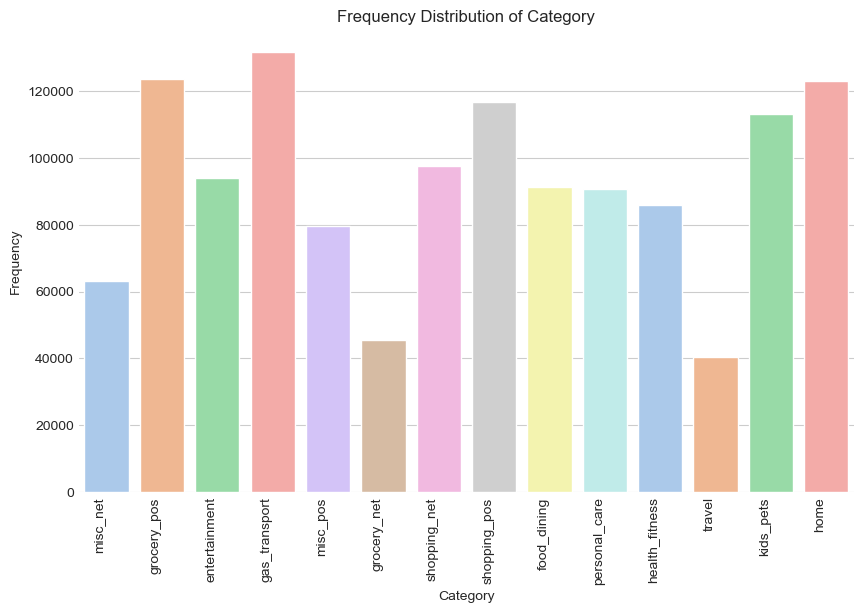

In [315]:
# Plotting the frequency distribution of transaction categories in the training dataset
sns.set_style("whitegrid")

# Plotting bar plot for the 'category' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df_train, palette='pastel')
plt.title('Frequency Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right') 
plt.show()


Gas_transport, home, and grocery_pos are the predominant categories among the transactions.

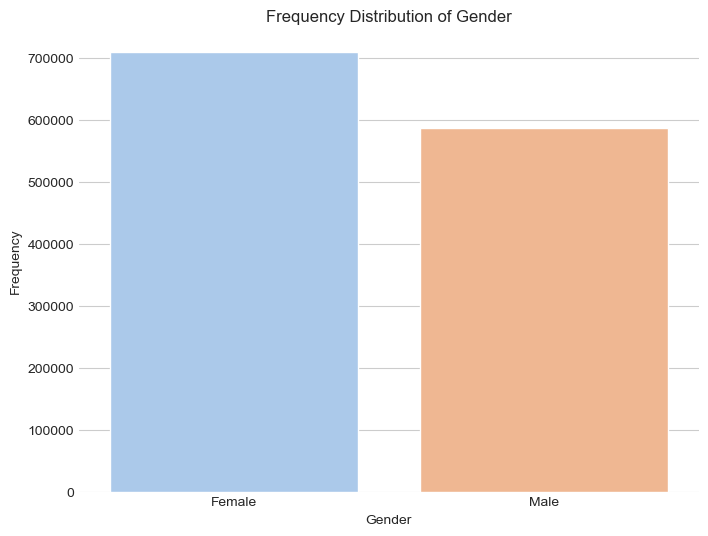

In [316]:
# Plotting the frequency distribution of gender in the training dataset
sns.set_style("whitegrid")
gender_mapping = {1: 'Male', 0: 'Female'}

# Plotting bar plot for the 'gender' feature
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_train.replace({'gender': gender_mapping}), palette='pastel')
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

There is a slight predominance of females over males.

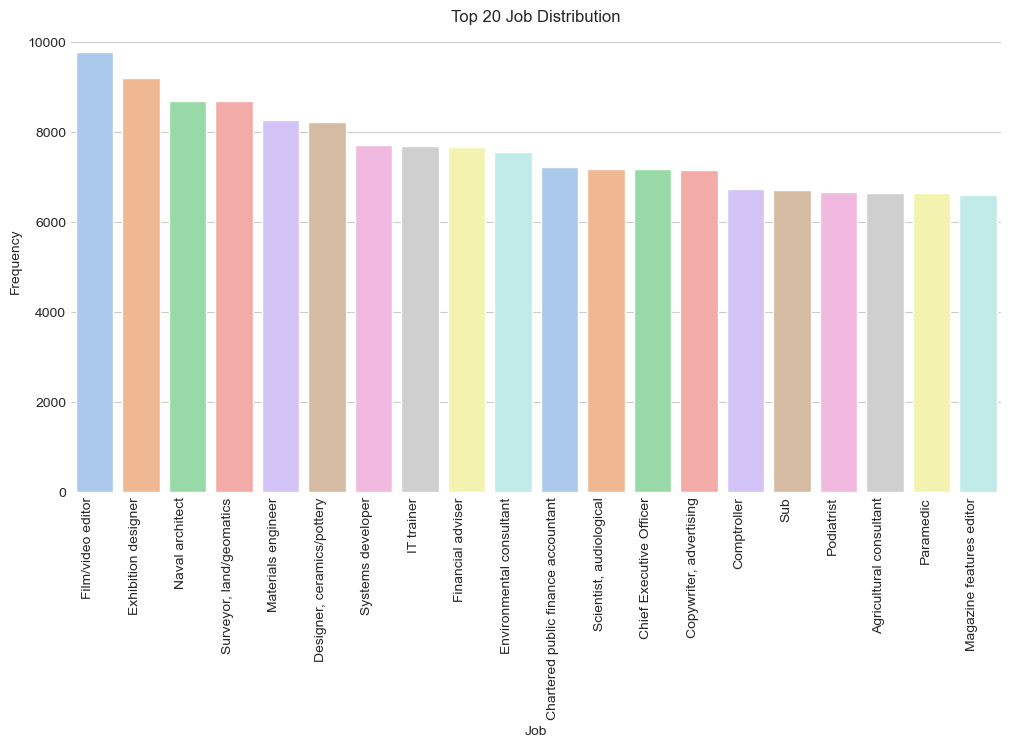

In [317]:
# Plotting the top 20 job distributions in the training dataset
sns.set_style("whitegrid")

# Plotting bar plot for the 'job' feature
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df_train, palette='pastel', order=df_train['job'].value_counts().index[:20])
plt.title('Top 20 Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()


Film/video editor, exhibition designer, naval architect, surveyor, and land/geomatics are the leading occupations in the top 20 job distributions of the training dataset.

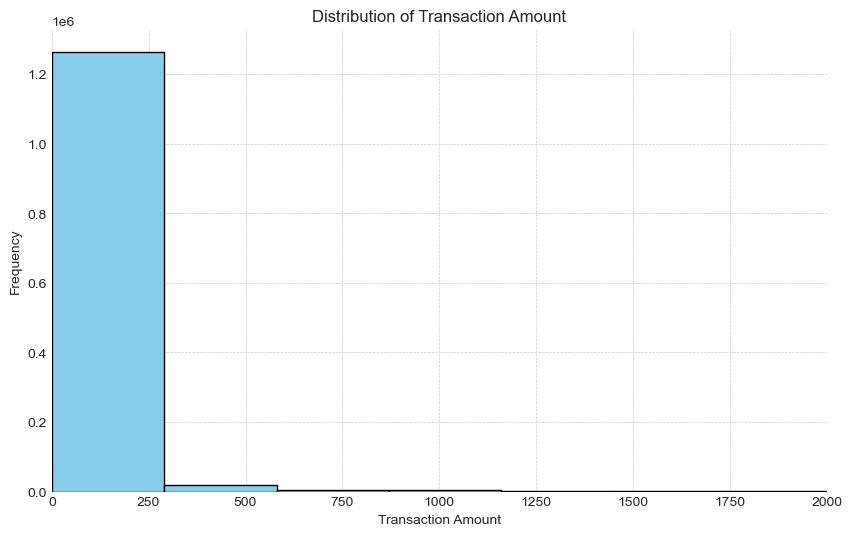

In [318]:
# Plotting the distribution of transaction amounts in the training dataset using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_train['amt'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xlim(0, 2000) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.show()


A significant number of transactions fall below an approx transaction amount of 300.

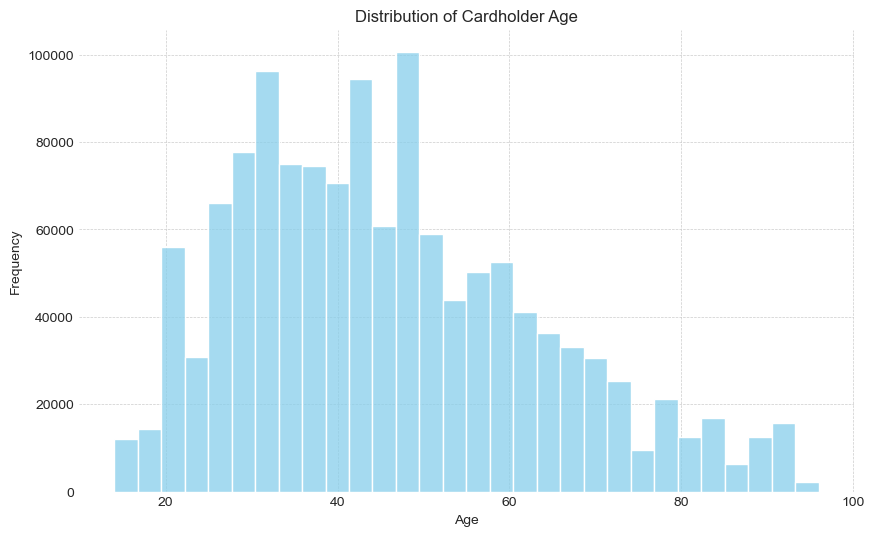

In [319]:
# Plotting the distribution of cardholder ages in the training dataset using a histogram
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_train['age'], bins=30, color='skyblue', kde=False)  
plt.title('Distribution of Cardholder Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.show()


The histogram displays a notable concentration of cardholder ages between 20 and 60.

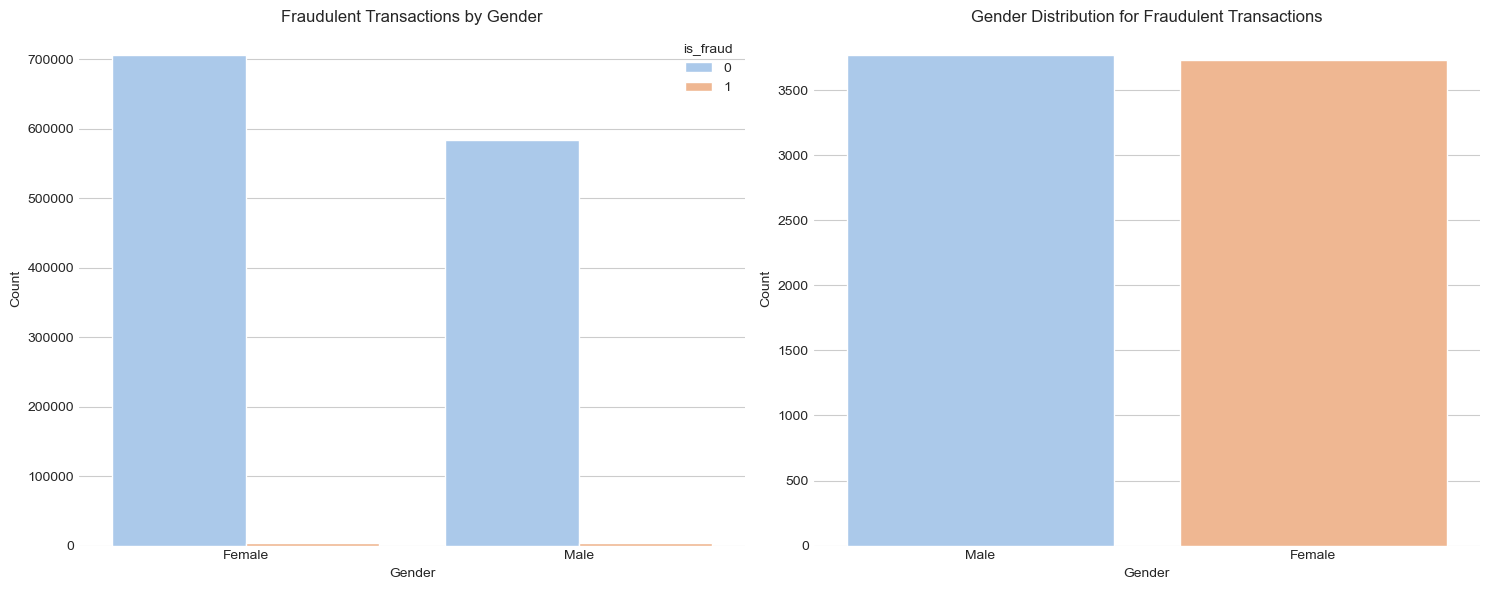

In [320]:
# Plotting fraudulent transactions by gender and gender distribution for fraudulent transactions
gender_mapping = {1: 'Male', 0: 'Female'}

df_train_mapped = df_train.replace({'gender': gender_mapping})
fraudulent_transactions = df_train_mapped[df_train_mapped['is_fraud'] == 1]
fraudulent_transactions_mapped = fraudulent_transactions.replace({'gender': gender_mapping})

sns.set_style("whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='gender', hue='is_fraud', data=df_train_mapped, palette='pastel', ax=axs[0])
axs[0].set_title('Fraudulent Transactions by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_fraud', loc='upper right')

sns.countplot(x='gender', data=fraudulent_transactions_mapped, palette='pastel', ax=axs[1])
axs[1].set_title('Gender Distribution for Fraudulent Transactions')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Fraudulent transactions seem to be distributed similarly across male and female cardholders.

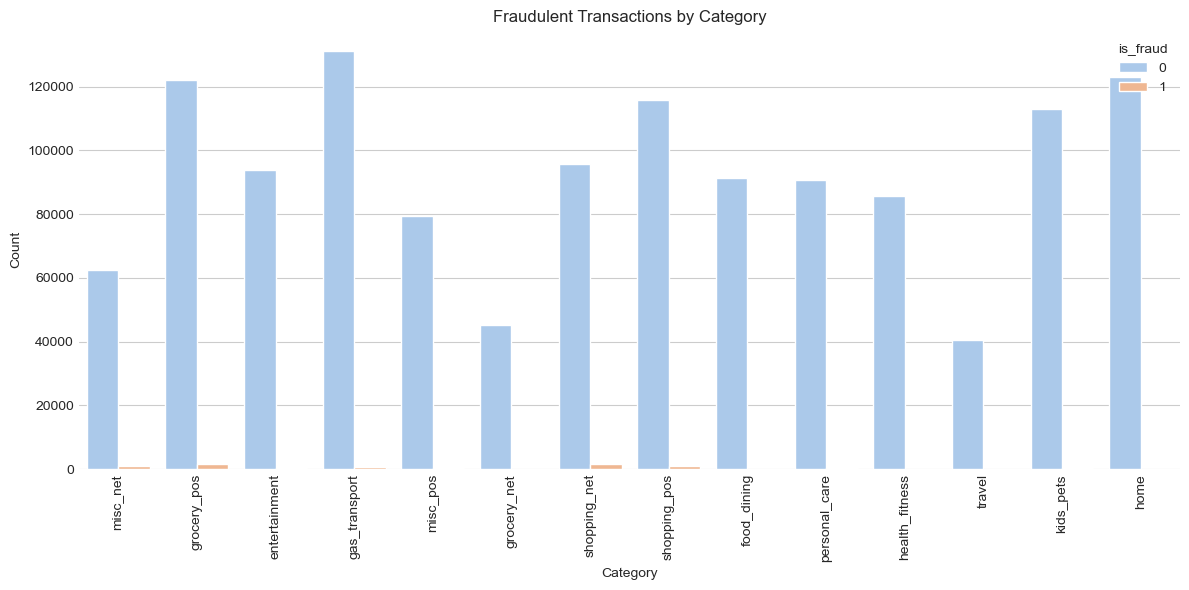

In [321]:
# Plotting fraudulent transactions by category
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=df_train, palette='pastel')
plt.title('Fraudulent Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='is_fraud', loc='upper right')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


Despite relatively lower total transaction volumes in categories like misc_net and shopping_net, they exhibit higher proportions of fraudulent transactions compared to other categories.

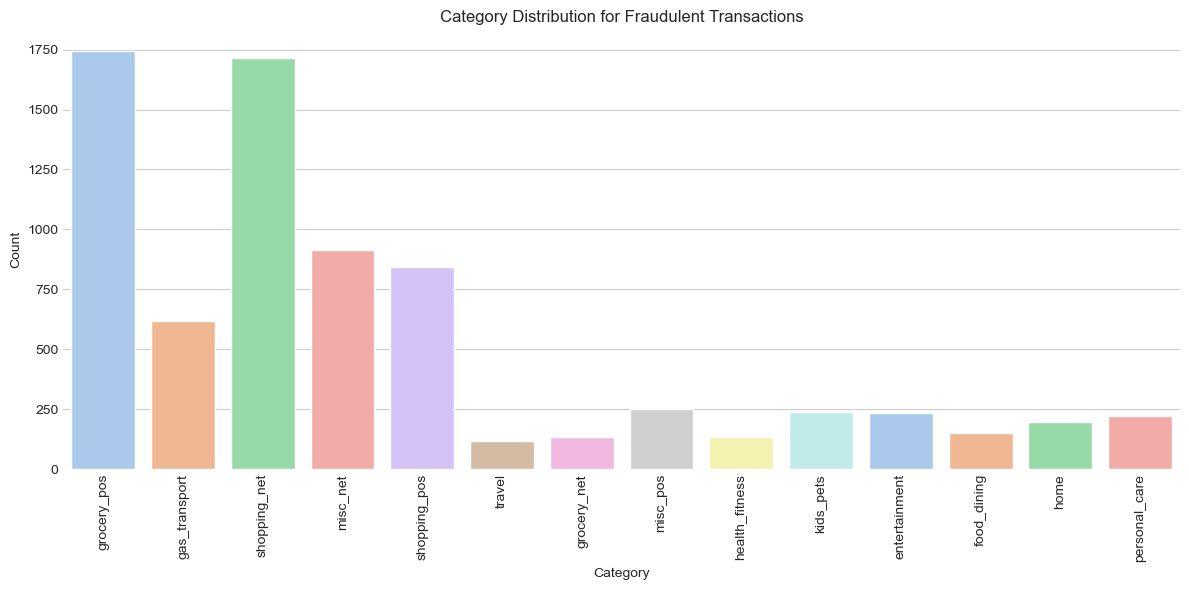

In [322]:
# Plotting the category distribution for fraudulent transactions
fraudulent_transactions = df_train[df_train['is_fraud'] == 1]

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=fraudulent_transactions, palette='pastel')
plt.title('Category Distribution for Fraudulent Transactions')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


Most fraudulent transactions originate from categories like grocery_pos and shopping_net.

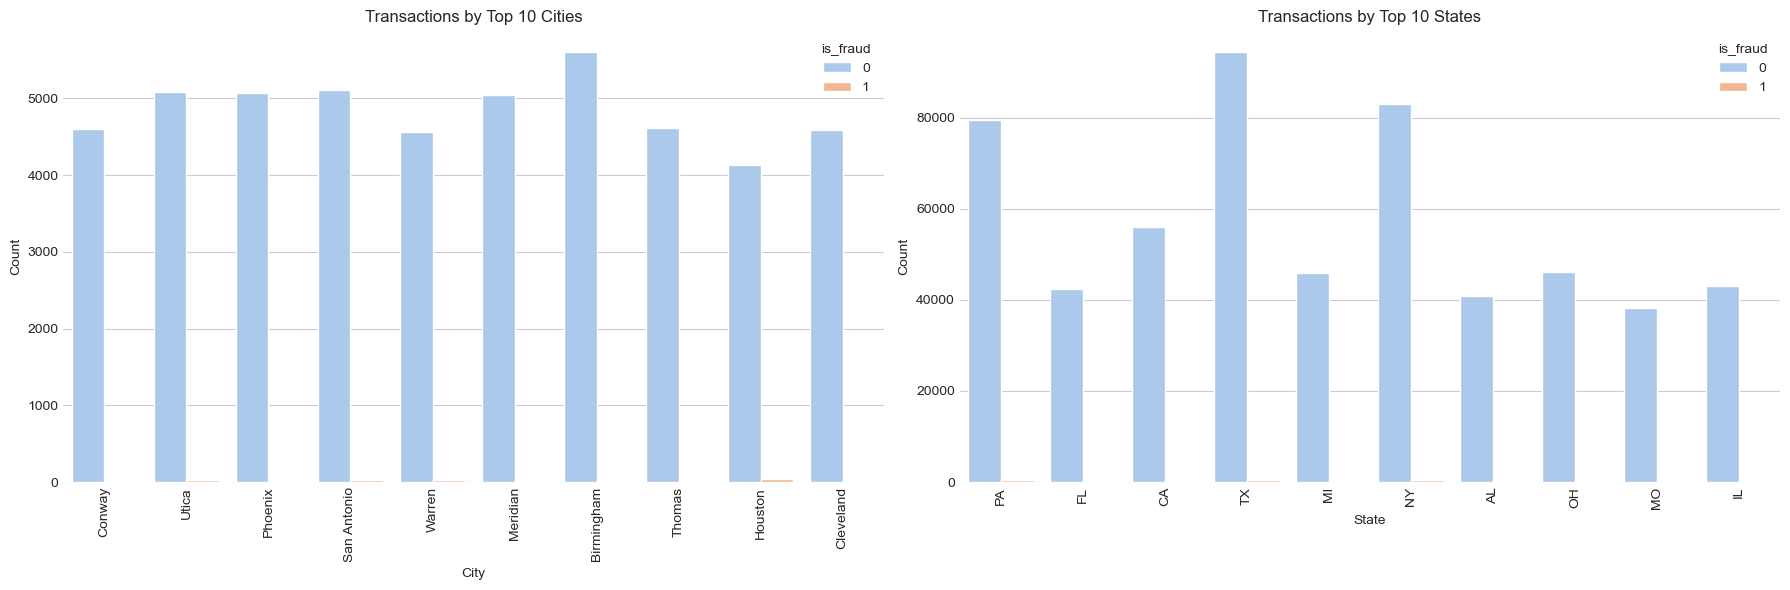

In [323]:
# Plotting fraudulent transactions by the top 10 cities and states

top_10_cities = df_train['city'].value_counts().head(10).index

df_top_10_cities = df_train[df_train['city'].isin(top_10_cities)]

top_10_states = df_train['state'].value_counts().head(10).index

df_top_10_states = df_train[df_train['state'].isin(top_10_states)]

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='city', hue='is_fraud', data=df_top_10_cities, palette='pastel', ax=axes[0])
axes[0].set_title('Transactions by Top 10 Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].legend(title='is_fraud', loc='upper right')
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x='state', hue='is_fraud', data=df_top_10_states, palette='pastel', ax=axes[1])
axes[1].set_title('Transactions by Top 10 States')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].legend(title='is_fraud', loc='upper right')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Despite Birmingham and Phoenix being among the cities with the highest total transaction counts, they exhibit relatively fewer fraudulent transactions. Conversely, Houston, while having lower transaction volumes, shows a higher percentage of fraudulent transactions. Regarding states, Pennsylvania (PA), Texas (TX), and New York (NY) have the highest incidences of fraud.

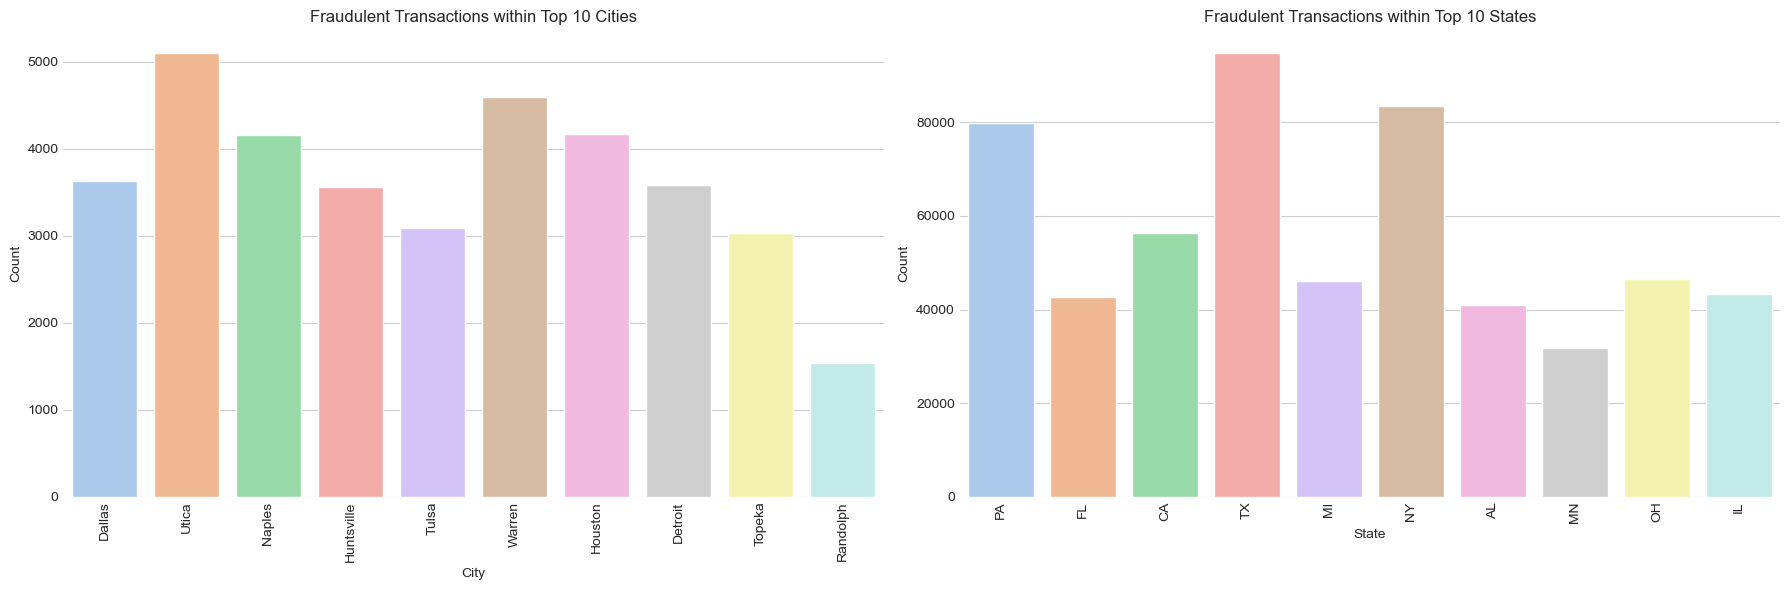

In [324]:
# Plotting the distribution of fraudulent transactions within the top 10 cities and states.

top_10_fraudulent_cities = df_train[df_train['is_fraud'] == 1]['city'].value_counts().head(10).index

df_top_10_fraudulent_cities = df_train[df_train['city'].isin(top_10_fraudulent_cities)]

top_10_fraudulent_states = df_train[df_train['is_fraud'] == 1]['state'].value_counts().head(10).index

df_top_10_fraudulent_states = df_train[df_train['state'].isin(top_10_fraudulent_states)]

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='city', data=df_top_10_fraudulent_cities, palette='pastel', ax=axes[0])
axes[0].set_title('Fraudulent Transactions within Top 10 Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(x='state', data=df_top_10_fraudulent_states, palette='pastel', ax=axes[1])
axes[1].set_title('Fraudulent Transactions within Top 10 States')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Among cities, Utica and Warren have the highest number of fraudulent transactions, while among states, Texas (TX), New York (NY), and Pennsylvania (PA) lead in fraudulent transactions.

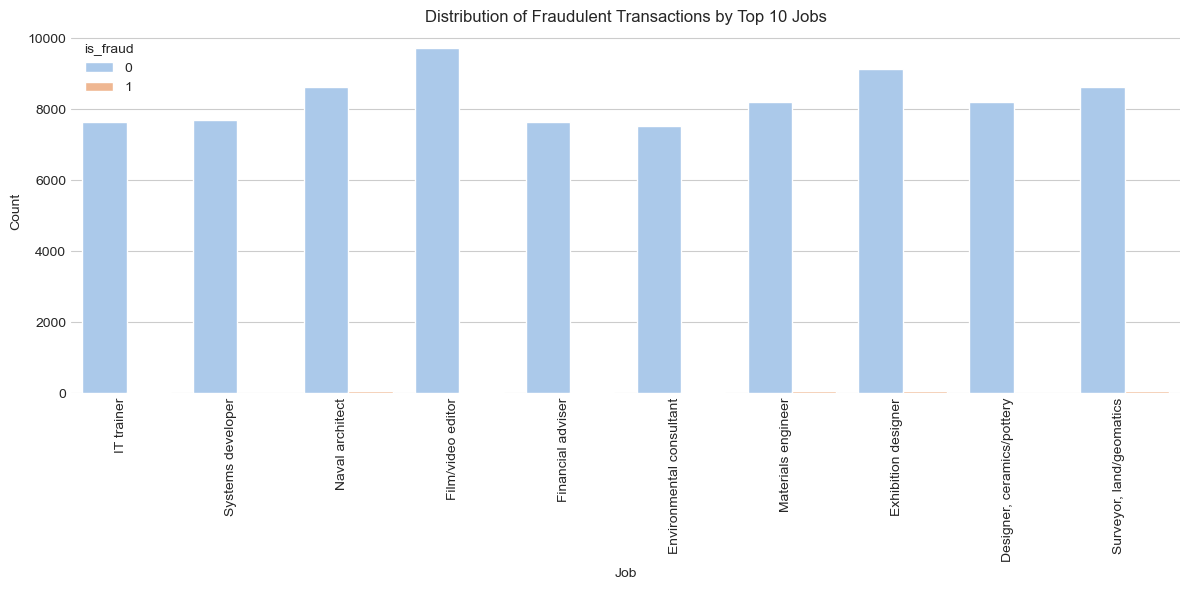

In [325]:
# Plotting the distribution of fraudulent transactions by the top 10 jobs
top_10_jobs = df_train['job'].value_counts().head(10).index

df_top_10_jobs = df_train[df_train['job'].isin(top_10_jobs)]

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='is_fraud', data=df_top_10_jobs, palette='pastel')
plt.title('Distribution of Fraudulent Transactions by Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  
plt.legend(title='is_fraud')
plt.tight_layout()
plt.show()


Fraudulent transactions are most prevalent among naval architects, materials engineers, exhibition designers, and surveyors/land geomatics professionals.

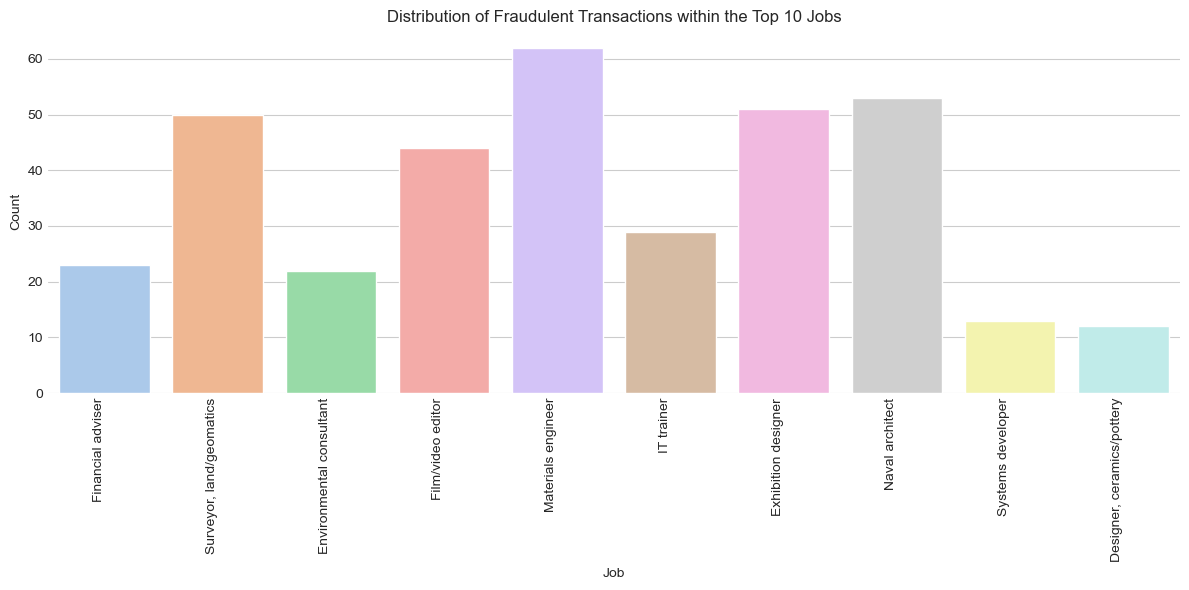

In [326]:
# Plotting the fraudulent transactions distribution within the top 10 jobs
top_10_jobs = df_train['job'].value_counts().head(10).index

df_fraudulent_top_10_jobs = df_train[(df_train['job'].isin(top_10_jobs)) & (df_train['is_fraud'] == 1)]

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df_fraudulent_top_10_jobs, palette='pastel')
plt.title('Distribution of Fraudulent Transactions within the Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()

When considering only fraudulent transactions, "Materials engineer" stands out as the job category with the highest number of frauds among the top 10 jobs.

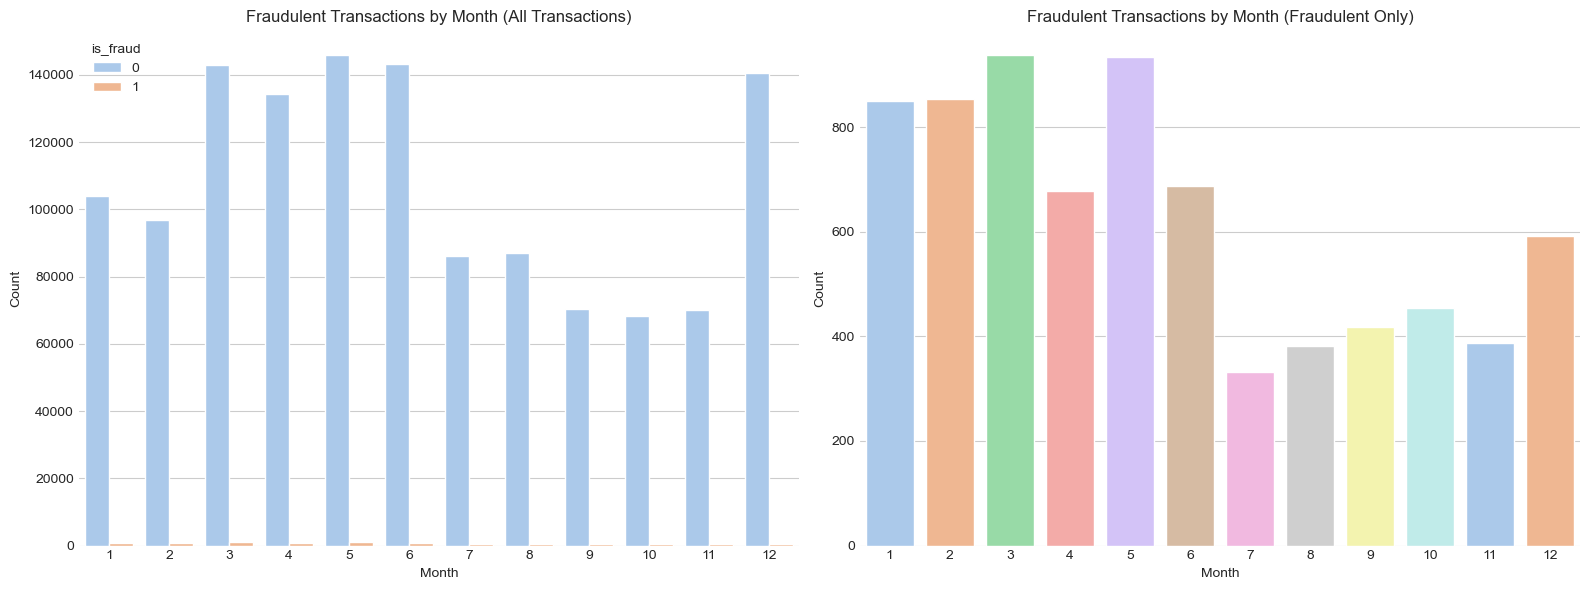

In [406]:
# Plotting fraudulent transactions by month and the month distribution for fraudulent transactions

fraudulent_transactions = df_train[df_train['is_fraud'] == 1]


sns.set_style("whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x='month', hue='is_fraud', data=df_train, palette='pastel', ax=axes[0])
axes[0].set_title('Fraudulent Transactions by Month (All Transactions)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')
axes[0].legend(title='is_fraud')


sns.countplot(x='month', data=fraudulent_transactions, palette='pastel', ax=axes[1])
axes[1].set_title('Fraudulent Transactions by Month (Fraudulent Only)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

The highest number of fraudulent transactions occurred in March and May.

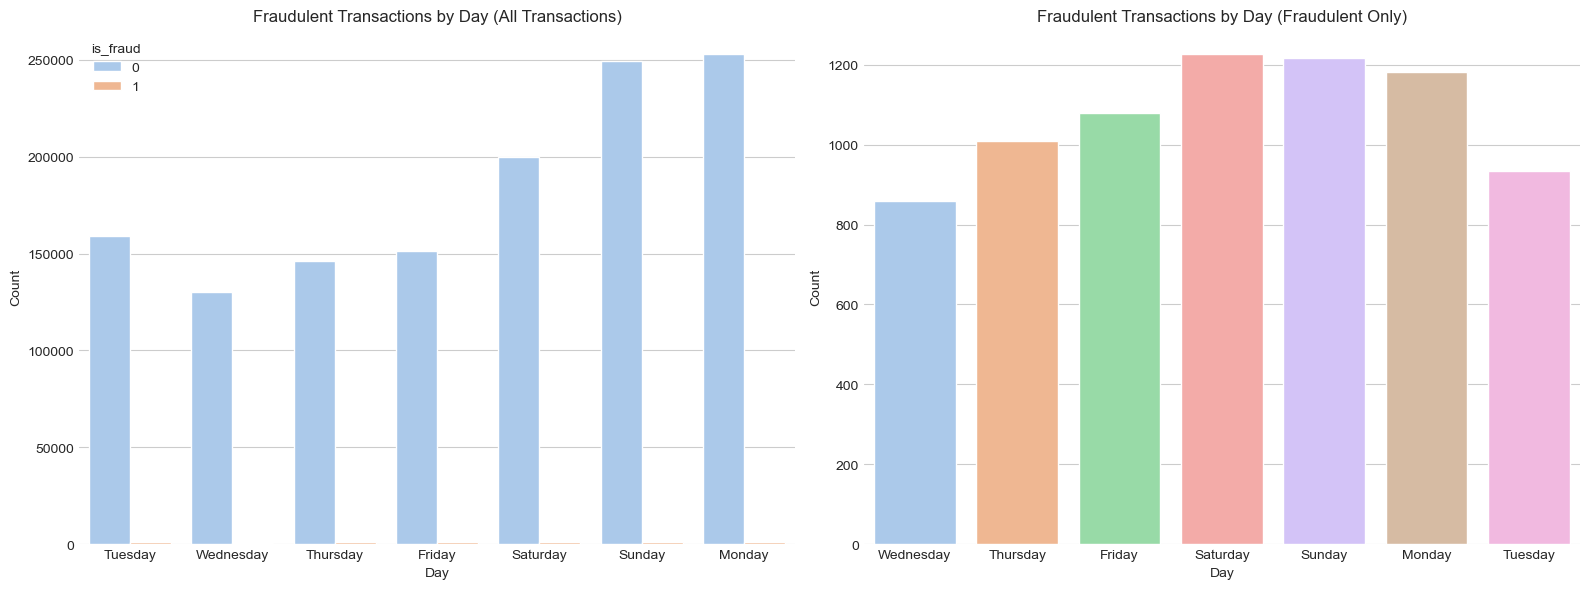

In [328]:
# Plotting fraudulent transactions by day and the day distribution for fraudulent transactions

fraudulent_transactions = df_train[df_train['is_fraud'] == 1]


sns.set_style("whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x='day', hue='is_fraud', data=df_train, palette='pastel', ax=axes[0])
axes[0].set_title('Fraudulent Transactions by Day (All Transactions)')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')
axes[0].legend(title='is_fraud')


sns.countplot(x='day', data=fraudulent_transactions, palette='pastel', ax=axes[1])
axes[1].set_title('Fraudulent Transactions by Day (Fraudulent Only)')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

 The majority of fraudulent transactions occurred on Friday, Saturday, Sunday, and Monday.

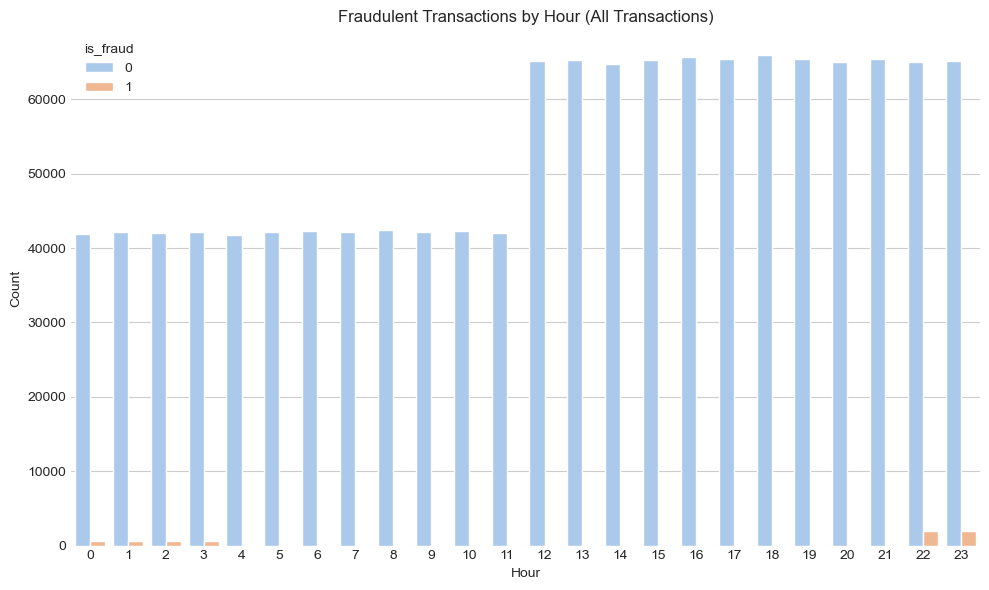

In [329]:
# Plotting fraudulent transactions by hour for all transactions
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='is_fraud', data=df_train, palette='pastel')
plt.title('Fraudulent Transactions by Hour (All Transactions)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.tight_layout()
plt.show()

Hours 22 and 23 exhibit the highest percentage of fraudulent transactions compared to all transactions.

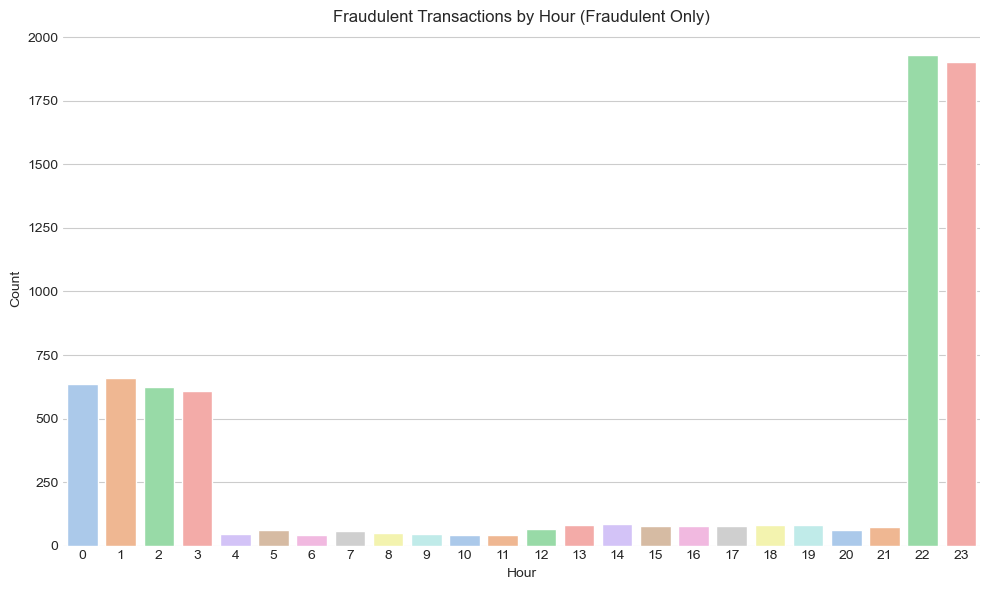

In [330]:
# Plotting distribution of hour variable for fraudulent transactions
fraudulent_transactions = df_train[df_train['is_fraud'] == 1]

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=fraudulent_transactions, palette='pastel')
plt.title('Fraudulent Transactions by Hour (Fraudulent Only)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The majority of fraudulent transactions occurred between hours 22 to 3.

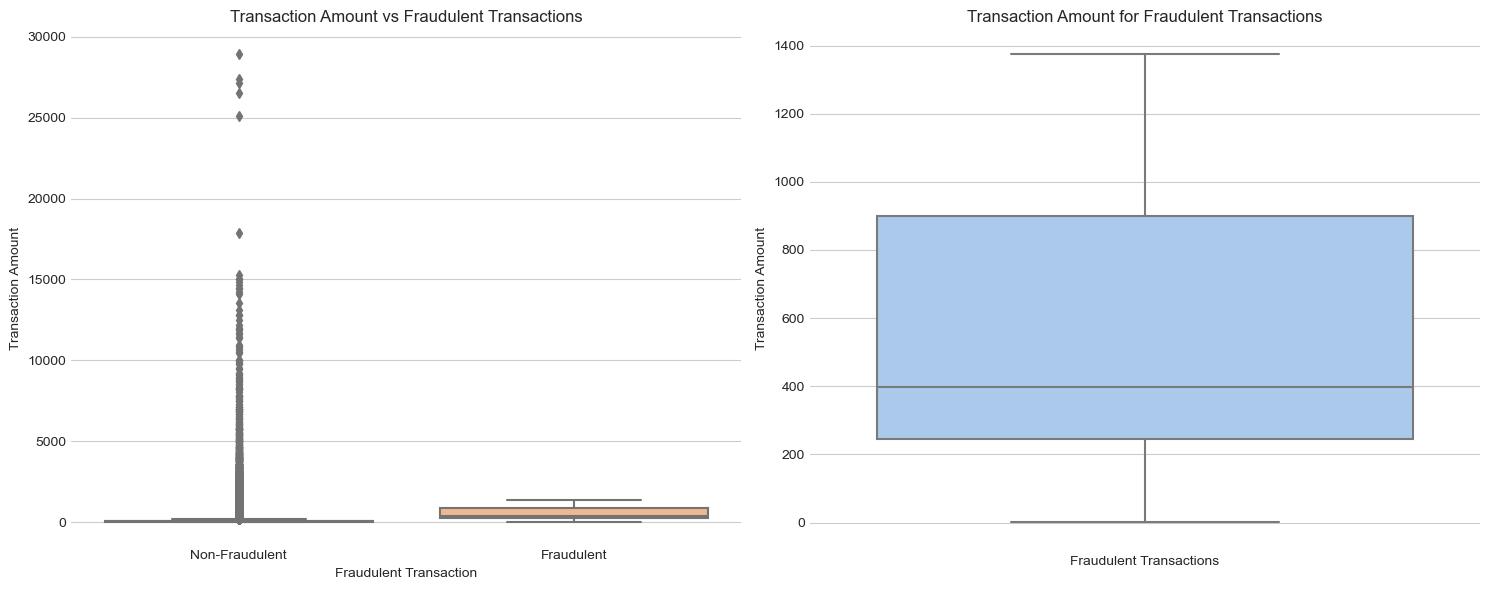

In [331]:
# Plotting the transaction amount distribution between non-fraudulent and fraudulent transactions (left plot) 

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='is_fraud', y='amt', data=df_train, palette='pastel', ax=axes[0])
axes[0].set_title('Transaction Amount vs Fraudulent Transactions')
axes[0].set_xlabel('Fraudulent Transaction')
axes[0].set_ylabel('Transaction Amount')
axes[0].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

# Plotting the transaction amount distribution specifically for fraudulent transactions only (right plot)
fraudulent_transactions = df_train[df_train['is_fraud'] == 1]

sns.boxplot(y='amt', data=fraudulent_transactions, palette='pastel', ax=axes[1], orient='v')
axes[1].set_title('Transaction Amount for Fraudulent Transactions')
axes[1].set_xlabel('Fraudulent Transactions')
axes[1].set_ylabel('Transaction Amount')

axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

* While there are no outliers in fraudulent transactions, the majority of fraudulent transactions are distributed noticeably higher compared to legitimate transactions.
* The majority of fraudulent transactions fall within the range of just above 200 to below 900 in terms of transaction amounts.

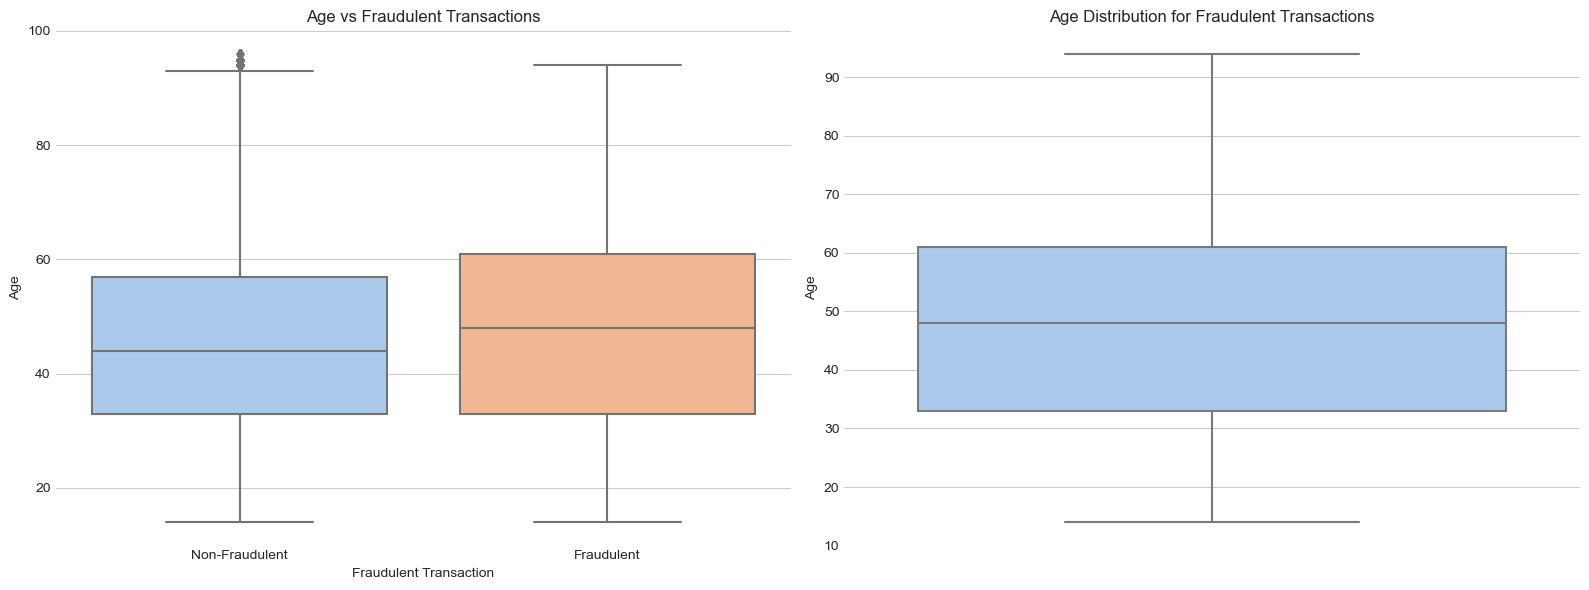

In [332]:
# Plotting the age distribution between non-fraudulent and fraudulent transactions (left plot)

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


sns.boxplot(x='is_fraud', y='age', data=df_train, palette='pastel', ax=axes[0])
axes[0].set_title('Age vs Fraudulent Transactions')
axes[0].set_xlabel('Fraudulent Transaction')
axes[0].set_ylabel('Age')
axes[0].set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

# Plotting the age distribution specifically for fraudulent transactions only (right plot)
fraudulent_transactions = df_train[df_train['is_fraud'] == 1]


sns.boxplot(y='age', data=fraudulent_transactions, palette='pastel', ax=axes[1])
axes[1].set_title('Age Distribution for Fraudulent Transactions')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

The age distribution for fraudulent transactions reveals that a significant portion of fraudulent transactions occurred for individuals aged just above 30 to below 65.

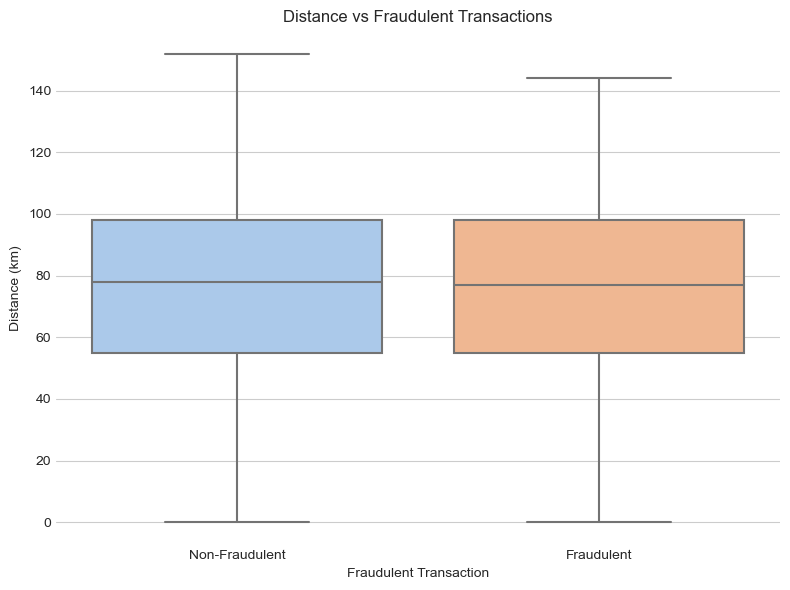

In [333]:
# Plotting the distance distribution between non-fraudulent and fraudulent transactions
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(x='is_fraud', y='distance_km', data=df_train, palette='pastel')
plt.title('Distance vs Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Distance (km)')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

plt.tight_layout()
plt.show()

The box plot indicates that the distribution of distances feature between non-fraudulent and fraudulent transactions exhibits similar patterns, with no significant divergence between the two categories.

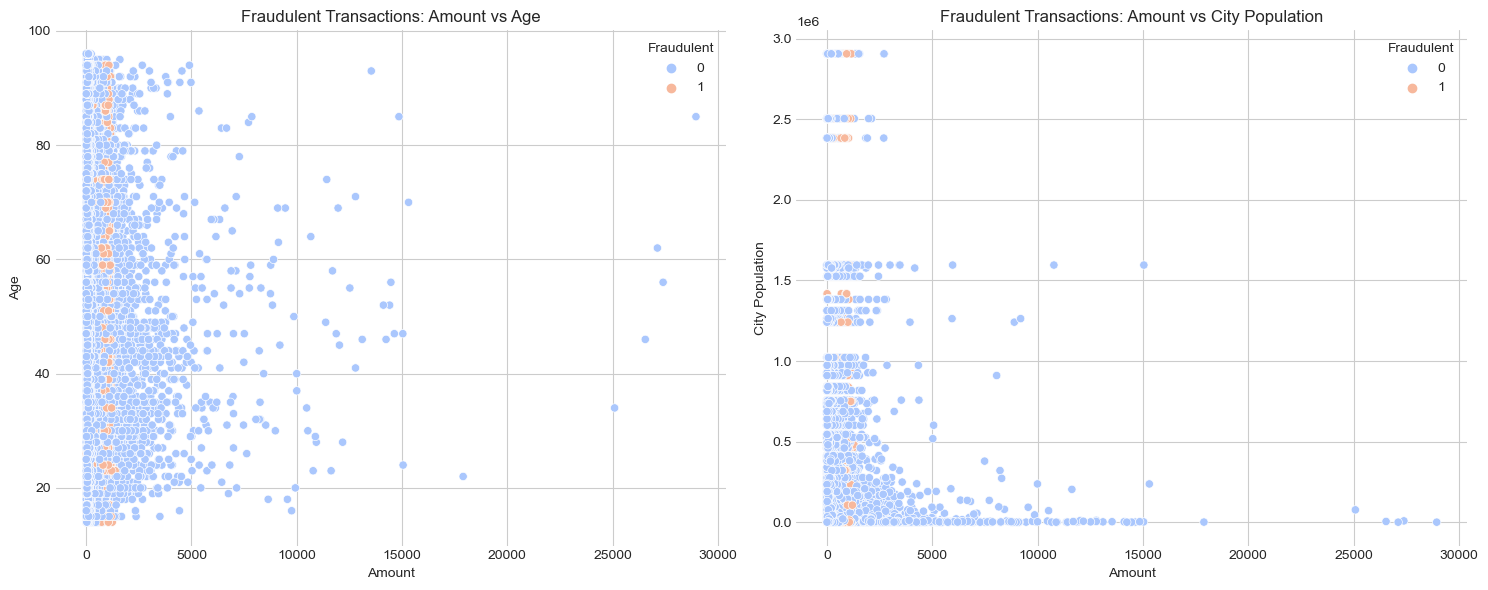

In [334]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot showing the relationship between transaction amount and age,with fraudulent transactions highlighted
sns.scatterplot(ax=axes[0], x='amt', y='age', hue='is_fraud', data=df_train, palette='coolwarm')
axes[0].set_title('Fraudulent Transactions: Amount vs Age')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Age')
axes[0].legend(title='Fraudulent', loc='upper right')

# Scatter plot: Transaction amount vs. City population,,with fraudulent transactions highlighted
sns.scatterplot(ax=axes[1], x='amt', y='city_pop', hue='is_fraud', data=df_train, palette='coolwarm')
axes[1].set_title('Fraudulent Transactions: Amount vs City Population')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('City Population')
axes[1].legend(title='Fraudulent', loc='upper right')

plt.tight_layout()
plt.show()

No apparent patterns are evident in either scatter plot, indicating no significant relationship between transaction amount and age, as well as transaction amount and city population, even when fraudulent transactions are highlighted.

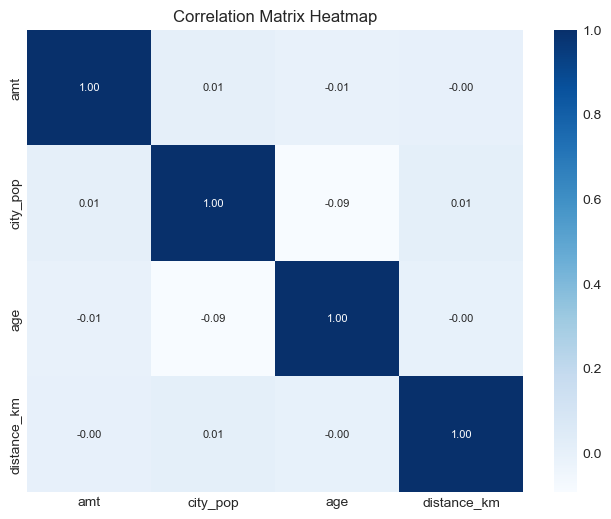

In [335]:
# Plotting a correlation matrix heatmap to visualize relationships between numeric features
numeric_cols = df_train[['amt','city_pop','age','distance_km']]

corr = numeric_cols.corr()

plt.figure(figsize=(8, 6))
color_palette = sns.color_palette("Blues", as_cmap=True)

sns.heatmap(corr, annot=True, cmap=color_palette, fmt=".2f", annot_kws={"size": 8})

plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix heatmap does not reveal any strong correlations between the numeric features.

## Data Preparation & Train / Test Data Splitting

In [336]:
# Defining useful categorical columns
categorical_cols = ['category', 'gender', 'city', 'state', 'job', 'hour', 'day', 'month']

# Extracting categorical features from training and test datasets
categorical_train_features = df_train[categorical_cols]
categorical_test_features = df_test[categorical_cols]

# Applying OneHotEncoder to encode categorical features
encoder = OneHotEncoder(drop='first',handle_unknown = 'ignore')
encoded_train_features = encoder.fit_transform(categorical_train_features)
encoded_test_features = encoder.transform(categorical_test_features)

# Separating the target variables
train_target = df_train['is_fraud']
test_target = df_test['is_fraud']

In [337]:
# Scaling numerical features using StandardScaler
scaler = StandardScaler()
numerical_cols = ['amt','city_pop','age','distance_km']
scaled_train_features = scaler.fit_transform(df_train[numerical_cols])
scaled_test_features = scaler.transform(df_test[numerical_cols])

In [338]:
# Concatenating encoded and scaled features using hstack from scipy for code optimization
from scipy.sparse import hstack

# Concatenating encoded and scaled features for train data
final_train_features = hstack((encoded_train_features, scaled_train_features))

# Concatenating encoded and scaled features for test data
final_test_features = hstack((encoded_test_features, scaled_test_features))

In [339]:
# Resampling the training data using SMOTE to address class imbalance.
smote = SMOTE(random_state=36)

x_train_resample_smote, y_train_resample_smote = smote.fit_resample(final_train_features, train_target)

In [340]:
# Resampling the training data using ADASYN to address class imbalance.
adasyn = ADASYN(random_state=36)

x_train_resample_adasyn, y_train_resample_adasyn = adasyn.fit_resample(final_train_features, train_target)

In [341]:
# Printing the current length of the resampled training data for SMOTE
print('Current length of the training dataset (SMOTE): ', len(y_train_resample_smote))

# Checking the distribution of the resampled target variable for SMOTE
print("\nDistribution of resampled target variable (SMOTE):")
print(y_train_resample_smote.value_counts())

# Printing the current length of the resampled training data for ADASYN
print('\nCurrent length of the training dataset (ADASYN): ', len(y_train_resample_adasyn))

# Checking the distribution of the resampled target variable for ADASYN
print("\nDistribution of resampled target variable (ADASYN):")
print(y_train_resample_adasyn.value_counts())

Current length of the training dataset (SMOTE):  2578338

Distribution of resampled target variable (SMOTE):
is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

Current length of the training dataset (ADASYN):  2577869

Distribution of resampled target variable (ADASYN):
is_fraud
0    1289169
1    1288700
Name: count, dtype: int64


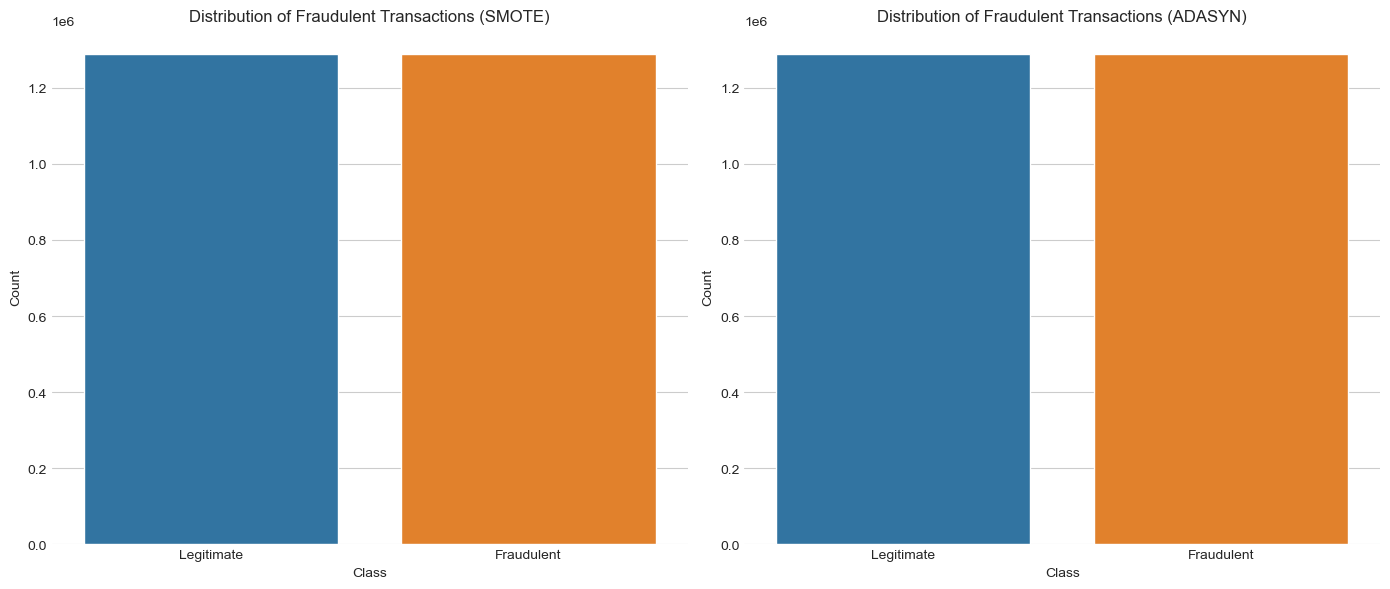

In [342]:
# Plotting the distribution using countplot for SMOTE
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_resample_smote)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions (SMOTE)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])

# Plotting the distribution using countplot for ADASYN
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resample_adasyn)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions (ADASYN)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])

plt.tight_layout()
plt.show()

The countplot graphs reveal a balanced distribution between legitimate and fraudulent transactions for both SMOTE and ADASYN datasets.

## Model Building, Hyperparameter Tuning & Model Evaluation

Building several machine learning models and evaluating their performance on both train and test data. 

Models to be built: 
* Logistic Regression
* Decision Tree 
* Random Forest
* XGBoost

* Each model is trained on datasets treated with SMOTE and ADASYN to assess their performance under different sampling strategies. 
* StratifiedKFold, a variation of k-fold cross-validation, is employed to assess the trained models, aiming to offer more dependable estimations of model performance.

#### Model 1 - Logistic Regression on SMOTE Data

In [343]:
# Performing cross-validation using StratifiedKFold to evaluate Logistic Regression models trained on SMOTE data

# Defining the number of folds for cross-validation
n_splits = 5

# Initializing StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
lg_smote_accuracy_scores = []
lg_smote_precision_scores = []
lg_smote_recall_scores = []
lg_smote_f1_scores = []

# Looping through each fold in the cross-validation
for train_index, val_index in skf.split(x_train_resample_smote, y_train_resample_smote):
    # Splitting data into training and validation sets for current fold
    X_train_fold, X_val_fold = x_train_resample_smote[train_index], x_train_resample_smote[val_index]
    y_train_fold, y_val_fold = y_train_resample_smote[train_index], y_train_resample_smote[val_index]

    # Initializing Logistic Regression model
    lg_smote_model = LogisticRegression()

    # Training the model on the training data for the current fold
    lg_smote_model.fit(X_train_fold, y_train_fold)

    # Making predictions on the validation data for the current fold
    val_predictions_lg_smote = lg_smote_model.predict(X_val_fold)

    # Calculating evaluation metrics for the current fold
    lg_smote_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions_lg_smote))
    lg_smote_precision_scores.append(precision_score(y_val_fold, val_predictions_lg_smote))
    lg_smote_recall_scores.append(recall_score(y_val_fold, val_predictions_lg_smote))
    lg_smote_f1_scores.append(f1_score(y_val_fold, val_predictions_lg_smote))

# Calculating average evaluation metrics across all folds
smote_avg_accuracy = sum(lg_smote_accuracy_scores) / n_splits
smote_avg_precision = sum(lg_smote_precision_scores) / n_splits
smote_avg_recall = sum(lg_smote_recall_scores) / n_splits
smote_avg_f1_score = sum(lg_smote_f1_scores) / n_splits

# Printing average evaluation metrics across all folds
print("Average Validation Metrics for Logistic Regression (SMOTE):")
print("Accuracy:", smote_avg_accuracy)
print("Precision:", smote_avg_precision)
print("Recall:", smote_avg_recall)
print("F1 Score:", smote_avg_f1_score)

Average Validation Metrics for Logistic Regression (SMOTE):
Accuracy: 0.9293804768682943
Precision: 0.918751996480861
Recall: 0.9420727626493168
F1 Score: 0.9302653945283748


In [344]:
# Making predictions on the test data using the trained model
test_predictions_smote = lg_smote_model.predict(final_test_features)

# Evaluating the model's performance on the test data
test_accuracy_smote = accuracy_score(test_target, test_predictions_smote)
test_precision_smote = precision_score(test_target, test_predictions_smote)
test_recall_smote = recall_score(test_target, test_predictions_smote)
test_f1_smote = f1_score(test_target, test_predictions_smote)

# Printing evaluation metrics for the model on the test data
print("Evaluation Metrics for Logistic Regression Model on Test Data (SMOTE):")
print("Accuracy:", test_accuracy_smote)
print("Precision:", test_precision_smote)
print("Recall:", test_recall_smote)
print("F1 Score:", test_f1_smote)

Evaluation Metrics for Logistic Regression Model on Test Data (SMOTE):
Accuracy: 0.9267777419883071
Precision: 0.021809249702262803
Recall: 0.4097902097902098
F1 Score: 0.04141440316615233


In [345]:
# Creating a DataFrame to display the evaluation metrics of the models
print("\033[1mEvaluation metrics of the models on train and test data:\033[0m")
print()

train_metrics_df = pd.DataFrame({
   'Model': ['Logistic Regression (SMOTE)'],
   'Accuracy': [smote_avg_accuracy],
   'Precision': [smote_avg_precision],
   'Recall': [smote_avg_recall],
   'F1 Score': [smote_avg_f1_score]
})

test_metrics_df = pd.DataFrame({
   'Model': ['Logistic Regression (SMOTE)'],
   'Accuracy': [test_accuracy_smote],
   'Precision': [test_precision_smote],
   'Recall': [test_recall_smote],
   'F1 Score': [test_f1_smote]
})

metrics_df = pd.concat([train_metrics_df.T, test_metrics_df.T], axis=1)
metrics_df.columns = ['Train', 'Test']
print(metrics_df)

Evaluation metrics of the models on train and test data:

                                 Train                         Test
Model      Logistic Regression (SMOTE)  Logistic Regression (SMOTE)
Accuracy                      0.929380                     0.926778
Precision                     0.918752                     0.021809
Recall                        0.942073                     0.409790
F1 Score                      0.930265                     0.041414


#### Model 2 - Logistic Regression on Adasyn Data

In [346]:
# Performing cross-validation using StratifiedKFold to evaluate Logistic Regression models trained on Adasyn data

# Defining the number of folds for cross-validation
n_splits = 5

# Initializing StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
lg_adasyn_accuracy_scores = []
lg_adasyn_precision_scores = []
lg_adasyn_recall_scores = []
lg_adasyn_f1_scores = []

# Looping through each fold in the cross-validation
for train_index, val_index in skf.split(x_train_resample_adasyn, y_train_resample_adasyn):
    # Splitting data into training and validation sets for current fold
    X_train_fold, X_val_fold = x_train_resample_adasyn[train_index], x_train_resample_adasyn[val_index]
    y_train_fold, y_val_fold = y_train_resample_adasyn[train_index], y_train_resample_adasyn[val_index]

    # Initializing Logistic Regression model
    lg_adasyn_model = LogisticRegression()

    # Training the model on the training data for the current fold
    lg_adasyn_model.fit(X_train_fold, y_train_fold)

    # Making predictions on the validation data for the current fold
    val_predictions_lg_adasyn = lg_adasyn_model.predict(X_val_fold)

    # Calculating evaluation metrics for the current fold
    lg_adasyn_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions_lg_adasyn))
    lg_adasyn_precision_scores.append(precision_score(y_val_fold, val_predictions_lg_adasyn))
    lg_adasyn_recall_scores.append(recall_score(y_val_fold, val_predictions_lg_adasyn))
    lg_adasyn_f1_scores.append(f1_score(y_val_fold, val_predictions_lg_adasyn))

# Calculating average evaluation metrics across all folds
lg_adasyn_avg_accuracy = sum(lg_adasyn_accuracy_scores) / n_splits
lg_adasyn_avg_precision = sum(lg_adasyn_precision_scores) / n_splits
lg_adasyn_avg_recall = sum(lg_adasyn_recall_scores) / n_splits
lg_adasyn_avg_f1_score = sum(lg_adasyn_f1_scores) / n_splits

# Printing average evaluation metrics across all folds
print("Average Validation Metrics for Logistic Regression (AdaSyn):")
print("Accuracy:", lg_adasyn_avg_accuracy)
print("Precision:", lg_adasyn_avg_precision)
print("Recall:", lg_adasyn_avg_recall)
print("F1 Score:", lg_adasyn_avg_f1_score)

Average Validation Metrics for Logistic Regression (AdaSyn):
Accuracy: 0.9171536647216738
Precision: 0.89683932352259
Recall: 0.9427151392876543
F1 Score: 0.9192049917757232


In [347]:
# Making predictions on the test data using the trained model
test_predictions_lg_adasyn = lg_adasyn_model.predict(final_test_features)

# Calculating evaluation metrics for the test data
test_accuracy_lg_adasyn = accuracy_score(test_target, test_predictions_lg_adasyn)
test_precision_lg_adasyn = precision_score(test_target, test_predictions_lg_adasyn)
test_recall_lg_adasyn = recall_score(test_target, test_predictions_lg_adasyn)
test_f1_lg_adasyn = f1_score(test_target, test_predictions_lg_adasyn)

# Printing evaluation metrics for the model on the test data
print("Evaluation Metrics for Logistic Regression Model on Test Data (AdaSyn):")
print("Accuracy:", test_accuracy_lg_adasyn)
print("Precision:", test_precision_lg_adasyn)
print("Recall:", test_recall_lg_adasyn)
print("F1 Score:", test_f1_lg_adasyn)

Evaluation Metrics for Logistic Regression Model on Test Data (AdaSyn):
Accuracy: 0.9011172912929016
Precision: 0.01568346907329958
Recall: 0.3986013986013986
F1 Score: 0.030179488537089003


In [348]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the models on train and test data:\033[0m")
print()

adasyn_train_metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression (AdaSyn)'],
    'Accuracy': [lg_adasyn_avg_accuracy],
    'Precision': [lg_adasyn_avg_precision],
    'Recall': [lg_adasyn_avg_recall],
    'F1 Score': [lg_adasyn_avg_f1_score]
})

adasyn_train_metrics_df = adasyn_train_metrics_df.T

adasyn_train_metrics_df.columns = ['Train']

adasyn_test_metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression (AdaSyn)'],
    'Accuracy': [test_accuracy_lg_adasyn],
    'Precision': [test_precision_lg_adasyn],
    'Recall': [test_recall_lg_adasyn],
    'F1 Score': [test_f1_lg_adasyn]
})

adasyn_test_metrics_df = adasyn_test_metrics_df.T


adasyn_test_metrics_df.columns = ['Test']


metrics_df_AdaSyn = pd.concat([adasyn_train_metrics_df, adasyn_test_metrics_df], axis=1)

metrics_df = pd.concat([metrics_df, metrics_df_AdaSyn])

print(metrics_df)

Evaluation metrics of the models on train and test data:

                                  Train                          Test
Model       Logistic Regression (SMOTE)   Logistic Regression (SMOTE)
Accuracy                       0.929380                      0.926778
Precision                      0.918752                      0.021809
Recall                         0.942073                      0.409790
F1 Score                       0.930265                      0.041414
Model      Logistic Regression (AdaSyn)  Logistic Regression (AdaSyn)
Accuracy                       0.917154                      0.901117
Precision                      0.896839                      0.015683
Recall                         0.942715                      0.398601
F1 Score                       0.919205                      0.030179


#### Model 3 - Decision Tree on SMOTE Data

In [349]:
# Performing cross-validation using StratifiedKFold to evaluate Decision Tree models trained on SMOTE data

# Defining the number of folds for cross-validation
n_splits = 5

# Defining the maximum depth for the Decision Tree
max_depth = 5  

# Initializing StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
dt_smote_accuracy_scores = []
dt_smote_precision_scores = []
dt_smote_recall_scores = []
dt_smote_f1_scores = []

# Looping through each fold in the cross-validation
for train_index, val_index in skf.split(x_train_resample_smote, y_train_resample_smote):
    # Splitting data into training and validation sets for current fold
    X_train_fold, X_val_fold = x_train_resample_smote[train_index], x_train_resample_smote[val_index]
    y_train_fold, y_val_fold = y_train_resample_smote[train_index], y_train_resample_smote[val_index]

    # Initializing Decision Tree model
    dt_smote_model = DecisionTreeClassifier(max_depth=max_depth,random_state= 42)

    # Training the model on the training data for the current fold
    dt_smote_model.fit(X_train_fold, y_train_fold)

    # Making predictions on the validation data for the current fold
    val_predictions_dt_smote = dt_smote_model.predict(X_val_fold)

    # Calculating evaluation metrics for the current fold
    dt_smote_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions_dt_smote))
    dt_smote_precision_scores.append(precision_score(y_val_fold, val_predictions_dt_smote))
    dt_smote_recall_scores.append(recall_score(y_val_fold, val_predictions_dt_smote))
    dt_smote_f1_scores.append(f1_score(y_val_fold, val_predictions_dt_smote))

# Calculating average evaluation metrics across all folds
dt_smote_avg_accuracy = sum(dt_smote_accuracy_scores) / n_splits
dt_smote_avg_precision = sum(dt_smote_precision_scores) / n_splits
dt_smote_avg_recall = sum(dt_smote_recall_scores) / n_splits
dt_smote_avg_f1_score = sum(dt_smote_f1_scores) / n_splits

# Printing average evaluation metrics across all folds
print("Average Validation Metrics for Decision Tree (SMOTE):")
print("Accuracy:", dt_smote_avg_accuracy)
print("Precision:", dt_smote_avg_precision)
print("Recall:", dt_smote_avg_recall)
print("F1 Score:", dt_smote_avg_f1_score)

Average Validation Metrics for Decision Tree (SMOTE):
Accuracy: 0.9522102999179435
Precision: 0.9703163595526039
Recall: 0.9329614662919482
F1 Score: 0.9512723126058654


In [350]:
# Making predictions on the test data using the trained model
test_predictions_dt_smote = dt_smote_model.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_dt_smote = accuracy_score(test_target, test_predictions_dt_smote)
test_precision_dt_smote = precision_score(test_target, test_predictions_dt_smote)
test_recall_dt_smote = recall_score(test_target, test_predictions_dt_smote)
test_f1_dt_smote = f1_score(test_target, test_predictions_dt_smote)

# Printing evaluation metrics on the test data
print("Evaluation Metrics for Decision Tree Model on Test Data (SMOTE):")
print("Accuracy:", test_accuracy_dt_smote)
print("Precision:", test_precision_dt_smote)
print("Recall:", test_recall_dt_smote)
print("F1 Score:", test_f1_dt_smote)

Evaluation Metrics for Decision Tree Model on Test Data (SMOTE):
Accuracy: 0.9714963857633084
Precision: 0.1037555697008275
Recall: 0.8358974358974359
F1 Score: 0.18459796149490373


In [351]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the models on train and test data:\033[0m")
print()

smote_train_metrics_df = pd.DataFrame({
    'Model': ['Decision Tree (SMOTE)'],
    'Accuracy': [dt_smote_avg_accuracy],
    'Precision': [dt_smote_avg_precision],
    'Recall': [dt_smote_avg_recall],
    'F1 Score': [dt_smote_avg_f1_score]
})

smote_train_metrics_df = smote_train_metrics_df.T

smote_train_metrics_df.columns = ['Train']

smote_test_metrics_df = pd.DataFrame({
    'Model': ['Decision Tree (SMOTE)'],
    'Accuracy': [test_accuracy_dt_smote],
    'Precision': [test_precision_dt_smote],
    'Recall': [test_recall_dt_smote],
    'F1 Score': [test_f1_dt_smote]
})

smote_test_metrics_df = smote_test_metrics_df.T

smote_test_metrics_df.columns = ['Test']

metrics_df_dt_smote = pd.concat([smote_train_metrics_df, smote_test_metrics_df], axis=1)

metrics_df = pd.concat([metrics_df, metrics_df_dt_smote])

print(metrics_df)

Evaluation metrics of the models on train and test data:

                                  Train                          Test
Model       Logistic Regression (SMOTE)   Logistic Regression (SMOTE)
Accuracy                       0.929380                      0.926778
Precision                      0.918752                      0.021809
Recall                         0.942073                      0.409790
F1 Score                       0.930265                      0.041414
Model      Logistic Regression (AdaSyn)  Logistic Regression (AdaSyn)
Accuracy                       0.917154                      0.901117
Precision                      0.896839                      0.015683
Recall                         0.942715                      0.398601
F1 Score                       0.919205                      0.030179
Model             Decision Tree (SMOTE)         Decision Tree (SMOTE)
Accuracy                       0.952210                      0.971496
Precision                      0

#### Model 4 - Decision Tree on Adasyn Data

In [352]:
# Performing cross-validation using StratifiedKFold to evaluate Decision Tree models trained on Adasyn data

# Defining the number of folds for cross-validation
n_splits = 5

# Defineingthe maximum depth for the Decision Tree
max_depth = 5  

# Initializing StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
dt_adasyn_accuracy_scores = []
dt_adasyn_precision_scores = []
dt_adasyn_recall_scores = []
dt_adasyn_f1_scores = []

# Looping through each fold in the cross-validation
for train_index, val_index in skf.split(x_train_resample_adasyn, y_train_resample_adasyn):
    # Splitting data into training and validation sets for the current fold
    X_train_fold, X_val_fold = x_train_resample_adasyn[train_index], x_train_resample_adasyn[val_index]
    y_train_fold, y_val_fold = y_train_resample_adasyn[train_index], y_train_resample_adasyn[val_index]

    # Initializing Decision Tree model
    dt_adasyn_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Training the model on the training data for the current fold
    dt_adasyn_model.fit(X_train_fold, y_train_fold)

    # Making predictions on the validation data for the current fold
    val_predictions_dt_adasyn = dt_adasyn_model.predict(X_val_fold)

    # Calculating evaluation metrics for the current fold
    dt_adasyn_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions_dt_adasyn))
    dt_adasyn_precision_scores.append(precision_score(y_val_fold, val_predictions_dt_adasyn))
    dt_adasyn_recall_scores.append(recall_score(y_val_fold, val_predictions_dt_adasyn))
    dt_adasyn_f1_scores.append(f1_score(y_val_fold, val_predictions_dt_adasyn))

# Calculating average evaluation metrics across all folds
dt_adasyn_avg_accuracy = sum(dt_adasyn_accuracy_scores) / n_splits
dt_adasyn_avg_precision = sum(dt_adasyn_precision_scores) / n_splits
dt_adasyn_avg_recall = sum(dt_adasyn_recall_scores) / n_splits
dt_adasyn_avg_f1_score = sum(dt_adasyn_f1_scores) / n_splits

# Printing average evaluation metrics across all folds
print("Average Validation Metrics for Decision Tree (AdaSyn):")
print("Accuracy:", dt_adasyn_avg_accuracy)
print("Precision:", dt_adasyn_avg_precision)
print("Recall:", dt_adasyn_avg_recall)
print("F1 Score:", dt_adasyn_avg_f1_score)

Average Validation Metrics for Decision Tree (AdaSyn):
Accuracy: 0.9256257785770415
Precision: 0.9118846393206217
Recall: 0.9430643283929541
F1 Score: 0.926861474278482


In [353]:
# Making predictions on the test data using the trained model
test_predictions_dt_adasyn = dt_adasyn_model.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_dt_adasyn = accuracy_score(test_target, test_predictions_dt_adasyn)
test_precision_dt_adasyn = precision_score(test_target, test_predictions_dt_adasyn)
test_recall_dt_adasyn = recall_score(test_target, test_predictions_dt_adasyn)
test_f1_dt_adasyn = f1_score(test_target, test_predictions_dt_adasyn)

# Printing evaluation metrics on the test data
print("Evaluation Metrics for Decision Tree Model on Test Data (AdaSyn):")
print("Accuracy:", test_accuracy_dt_adasyn)
print("Precision:", test_precision_dt_adasyn)
print("Recall:", test_recall_dt_adasyn)
print("F1 Score:", test_f1_dt_adasyn)

Evaluation Metrics for Decision Tree Model on Test Data (AdaSyn):
Accuracy: 0.899006512284086
Precision: 0.034527361468016486
Recall: 0.9333333333333333
F1 Score: 0.06659127195316658


In [354]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the models on train and test data:\033[0m")
print()

adasyn_train_metrics_df = pd.DataFrame({
    'Model': ['Decision Tree (AdaSyn)'],
    'Accuracy': [dt_adasyn_avg_accuracy],
    'Precision': [dt_adasyn_avg_precision],
    'Recall': [dt_adasyn_avg_recall],
    'F1 Score': [dt_adasyn_avg_f1_score]
})

adasyn_train_metrics_df = adasyn_train_metrics_df.T

adasyn_train_metrics_df.columns = ['Train']

adasyn_test_metrics_df = pd.DataFrame({
    'Model': ['Decision Tree (AdaSyn)'],
    'Accuracy': [test_accuracy_dt_adasyn],
    'Precision': [test_precision_dt_adasyn],
    'Recall': [test_recall_dt_adasyn],
    'F1 Score': [test_f1_dt_adasyn]
})

adasyn_test_metrics_df = adasyn_test_metrics_df.T

adasyn_test_metrics_df.columns = ['Test']

metrics_df_dt_adasyn = pd.concat([adasyn_train_metrics_df, adasyn_test_metrics_df], axis=1)

metrics_df = pd.concat([metrics_df, metrics_df_dt_adasyn])

print(metrics_df)

Evaluation metrics of the models on train and test data:

                                  Train                          Test
Model       Logistic Regression (SMOTE)   Logistic Regression (SMOTE)
Accuracy                       0.929380                      0.926778
Precision                      0.918752                      0.021809
Recall                         0.942073                      0.409790
F1 Score                       0.930265                      0.041414
Model      Logistic Regression (AdaSyn)  Logistic Regression (AdaSyn)
Accuracy                       0.917154                      0.901117
Precision                      0.896839                      0.015683
Recall                         0.942715                      0.398601
F1 Score                       0.919205                      0.030179
Model             Decision Tree (SMOTE)         Decision Tree (SMOTE)
Accuracy                       0.952210                      0.971496
Precision                      0

#### Model 5 - Random Forest on SMOTE Data

In [355]:
# Performing cross-validation using StratifiedKFold to evaluate Random Forest models trained on SMOTE data

# Defining the number of folds for cross-validation
n_splits = 5

# Defining the maximum depth for the Random Forest
max_depth = 5  

# Defining the number of trees for the Random Forest
n_estimators = 50  

# Initializing StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
rf_smote_accuracy_scores = []
rf_smote_precision_scores = []
rf_smote_recall_scores = []
rf_smote_f1_scores = []

# Looping through each fold in the cross-validation
for train_index, val_index in skf.split(x_train_resample_smote, y_train_resample_smote):
    # Splitting data into training and validation sets for current fold
    X_train_fold, X_val_fold = x_train_resample_smote[train_index], x_train_resample_smote[val_index]
    y_train_fold, y_val_fold = y_train_resample_smote[train_index], y_train_resample_smote[val_index]

    # Initializing Random Forest model with specified number of trees and maximum depth
    rf_smote_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Training the model on the training data for the current fold
    rf_smote_model.fit(X_train_fold, y_train_fold)

    # Making predictions on the validation data for the current fold
    val_predictions_rf_smote = rf_smote_model.predict(X_val_fold)

    # Calculating evaluation metrics for the current fold
    rf_smote_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions_rf_smote))
    rf_smote_precision_scores.append(precision_score(y_val_fold, val_predictions_rf_smote))
    rf_smote_recall_scores.append(recall_score(y_val_fold, val_predictions_rf_smote))
    rf_smote_f1_scores.append(f1_score(y_val_fold, val_predictions_rf_smote))

# Calculating average evaluation metrics across all folds
rf_smote_avg_accuracy = sum(rf_smote_accuracy_scores) / n_splits
rf_smote_avg_precision = sum(rf_smote_precision_scores) / n_splits
rf_smote_avg_recall = sum(rf_smote_recall_scores) / n_splits
rf_smote_avg_f1_score = sum(rf_smote_f1_scores) / n_splits

# Printing average evaluation metrics across all folds
print("Average Validation Metrics for Random Forest (SMOTE):")
print("Accuracy:", rf_smote_avg_accuracy)
print("Precision:", rf_smote_avg_precision)
print("Recall:", rf_smote_avg_recall)
print("F1 Score:", rf_smote_avg_f1_score)

Average Validation Metrics for Random Forest (SMOTE):
Accuracy: 0.9115938269658447
Precision: 0.9112628924941358
Recall: 0.9119952500026501
F1 Score: 0.911628610733669


In [356]:
# Making predictions on the test data
test_predictions_rf_smote = rf_smote_model.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_rf_smote = accuracy_score(test_target, test_predictions_rf_smote)
test_precision_rf_smote = precision_score(test_target, test_predictions_rf_smote)
test_recall_rf_smote = recall_score(test_target, test_predictions_rf_smote)
test_f1_rf_smote = f1_score(test_target, test_predictions_rf_smote)

# Printing evaluation metrics on the test data
print("\nEvaluation Metrics for Random Forest Model on Test Data (SMOTE):")
print("Accuracy:", test_accuracy_rf_smote)
print("Precision:", test_precision_rf_smote)
print("Recall:", test_recall_rf_smote)
print("F1 Score:", test_f1_rf_smote)


Evaluation Metrics for Random Forest Model on Test Data (SMOTE):
Accuracy: 0.9183022354823211
Precision: 0.03353750593107018
Recall: 0.7249417249417249
F1 Score: 0.0641091711158294


In [357]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the models on train and test data:\033[0m")
print()

rf_smote_train_metrics_df = pd.DataFrame({
    'Model': ['Random Forest (SMOTE)'],
    'Accuracy': [rf_smote_avg_accuracy],
    'Precision': [rf_smote_avg_precision],
    'Recall': [rf_smote_avg_recall],
    'F1 Score': [rf_smote_avg_f1_score]
})

rf_smote_train_metrics_df = rf_smote_train_metrics_df.T

rf_smote_train_metrics_df.columns = ['Train']

rf_smote_test_metrics_df = pd.DataFrame({
    'Model': ['Random Forest (SMOTE)'],
    'Accuracy': [test_accuracy_rf_smote],
    'Precision': [test_precision_rf_smote],
    'Recall': [test_recall_rf_smote],
    'F1 Score': [test_f1_rf_smote]
})

rf_smote_test_metrics_df = rf_smote_test_metrics_df.T

rf_smote_test_metrics_df.columns = ['Test']

metrics_df_rf_smote = pd.concat([rf_smote_train_metrics_df, rf_smote_test_metrics_df], axis=1)

metrics_df = pd.concat([metrics_df, metrics_df_rf_smote])

print(metrics_df)

Evaluation metrics of the models on train and test data:

                                  Train                          Test
Model       Logistic Regression (SMOTE)   Logistic Regression (SMOTE)
Accuracy                       0.929380                      0.926778
Precision                      0.918752                      0.021809
Recall                         0.942073                      0.409790
F1 Score                       0.930265                      0.041414
Model      Logistic Regression (AdaSyn)  Logistic Regression (AdaSyn)
Accuracy                       0.917154                      0.901117
Precision                      0.896839                      0.015683
Recall                         0.942715                      0.398601
F1 Score                       0.919205                      0.030179
Model             Decision Tree (SMOTE)         Decision Tree (SMOTE)
Accuracy                       0.952210                      0.971496
Precision                      0

#### Model 6 - Random Forest on Adasyn Data

In [358]:
# Performing cross-validation using StratifiedKFold to evaluate Random Forest models trained on Adasyn data

# Defining the number of folds for cross-validation
n_splits = 5

# Defining the maximum depth for the Random Forest
max_depth = 5  

# Defining the number of trees for the Random Forest
n_estimators = 50  

# Initializing StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
rf_adasyn_accuracy_scores = []
rf_adasyn_precision_scores = []
rf_adasyn_recall_scores = []
rf_adasyn_f1_scores = []

# Looping through each fold in the cross-validation
for train_index, val_index in skf.split(x_train_resample_adasyn, y_train_resample_adasyn):
    # Splitting data into training and validation sets for current fold
    X_train_fold, X_val_fold = x_train_resample_adasyn[train_index], x_train_resample_adasyn[val_index]
    y_train_fold, y_val_fold = y_train_resample_adasyn[train_index], y_train_resample_adasyn[val_index]

    # Initializing Random Forest model with specified number of trees and maximum depth
    rf_adasyn_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Training the model on the training data for the current fold
    rf_adasyn_model.fit(X_train_fold, y_train_fold)

    # Making predictions on the validation data for the current fold
    val_predictions_rf_adasyn = rf_adasyn_model.predict(X_val_fold)

    # Calculating evaluation metrics for the current fold
    rf_adasyn_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions_rf_adasyn))
    rf_adasyn_precision_scores.append(precision_score(y_val_fold, val_predictions_rf_adasyn))
    rf_adasyn_recall_scores.append(recall_score(y_val_fold, val_predictions_rf_adasyn))
    rf_adasyn_f1_scores.append(f1_score(y_val_fold, val_predictions_rf_adasyn))

# Calculating average evaluation metrics across all folds
rf_adasyn_avg_accuracy = sum(rf_adasyn_accuracy_scores) / n_splits
rf_adasyn_avg_precision = sum(rf_adasyn_precision_scores) / n_splits
rf_adasyn_avg_recall = sum(rf_adasyn_recall_scores) / n_splits
rf_adasyn_avg_f1_score = sum(rf_adasyn_f1_scores) / n_splits

# Printing average evaluation metrics across all folds
print("Average Validation Metrics for Random Forest (ADASYN):")
print("Accuracy:", rf_adasyn_avg_accuracy)
print("Precision:", rf_adasyn_avg_precision)
print("Recall:", rf_adasyn_avg_recall)
print("F1 Score:", rf_adasyn_avg_f1_score)

Average Validation Metrics for Random Forest (ADASYN):
Accuracy: 0.906614727046331
Precision: 0.8777330346376397
Recall: 0.9448126018468225
F1 Score: 0.9100351235369061


In [359]:
# Making predictions on the test data
test_predictions_rf_adasyn = rf_adasyn_model.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_rf_adasyn = accuracy_score(test_target, test_predictions_rf_adasyn)
test_precision_rf_adasyn = precision_score(test_target, test_predictions_rf_adasyn)
test_recall_rf_adasyn = recall_score(test_target, test_predictions_rf_adasyn)
test_f1_rf_adasyn = f1_score(test_target, test_predictions_rf_adasyn)

# Printing evaluation metrics on the test data
print("\nEvaluation Metrics for Random Forest Model on Test Data (ADASYN):")
print("Accuracy:", test_accuracy_rf_adasyn)
print("Precision:", test_precision_rf_adasyn)
print("Recall:", test_recall_rf_adasyn)
print("F1 Score:", test_f1_rf_adasyn)


Evaluation Metrics for Random Forest Model on Test Data (ADASYN):
Accuracy: 0.8823937997441152
Precision: 0.024020722579479226
Recall: 0.7435897435897436
F1 Score: 0.046538091208823275


In [360]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the models on train and test data:\033[0m")
print()

rf_adasyn_train_metrics_df = pd.DataFrame({
    'Model': ['Random Forest (ADASYN)'],
    'Accuracy': [rf_adasyn_avg_accuracy],
    'Precision': [rf_adasyn_avg_precision],
    'Recall': [rf_adasyn_avg_recall],
    'F1 Score': [rf_adasyn_avg_f1_score]
})

rf_adasyn_train_metrics_df = rf_adasyn_train_metrics_df.T

rf_adasyn_train_metrics_df.columns = ['Train']

rf_adasyn_test_metrics_df = pd.DataFrame({
    'Model': ['Random Forest (ADASYN)'],
    'Accuracy': [test_accuracy_rf_adasyn],
    'Precision': [test_precision_rf_adasyn],
    'Recall': [test_recall_rf_adasyn],
    'F1 Score': [test_f1_rf_adasyn]
})

rf_adasyn_test_metrics_df = rf_adasyn_test_metrics_df.T

rf_adasyn_test_metrics_df.columns = ['Test']

metrics_df_rf_adasyn = pd.concat([rf_adasyn_train_metrics_df, rf_adasyn_test_metrics_df], axis=1)

metrics_df = pd.concat([metrics_df, metrics_df_rf_adasyn])

print(metrics_df)

Evaluation metrics of the models on train and test data:

                                  Train                          Test
Model       Logistic Regression (SMOTE)   Logistic Regression (SMOTE)
Accuracy                       0.929380                      0.926778
Precision                      0.918752                      0.021809
Recall                         0.942073                      0.409790
F1 Score                       0.930265                      0.041414
Model      Logistic Regression (AdaSyn)  Logistic Regression (AdaSyn)
Accuracy                       0.917154                      0.901117
Precision                      0.896839                      0.015683
Recall                         0.942715                      0.398601
F1 Score                       0.919205                      0.030179
Model             Decision Tree (SMOTE)         Decision Tree (SMOTE)
Accuracy                       0.952210                      0.971496
Precision                      0

#### Model 7 - XGBoost on SMOTE Data

In [361]:
# Performing cross-validation using StratifiedKFold to evaluate XGBoost models trained on SMOTE data

# Defining the number of folds for cross-validation
n_splits = 5

# Defining the maximum depth for the XGBoost model
max_depth = 5  

# Defining the number of trees for the XGBoost model
n_estimators = 50  

# Initializing StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
xgb_smote_accuracy_scores = []
xgb_smote_precision_scores = []
xgb_smote_recall_scores = []
xgb_smote_f1_scores = []

# Looping through each fold in the cross-validation
for train_index, val_index in skf.split(x_train_resample_smote, y_train_resample_smote):
    # Splitting data into training and validation sets for the current fold
    X_train_fold, X_val_fold = x_train_resample_smote[train_index], x_train_resample_smote[val_index]
    y_train_fold, y_val_fold = y_train_resample_smote[train_index], y_train_resample_smote[val_index]

    # Initializing XGBoost model
    xgb_smote_model = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)

    # Training the model on the training data for the current fold
    xgb_smote_model.fit(X_train_fold, y_train_fold)

    # Making predictions on the validation data for the current fold
    val_predictions_xgb_smote = xgb_smote_model.predict(X_val_fold)

    # Calculating evaluation metrics for the current fold
    xgb_smote_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions_xgb_smote))
    xgb_smote_precision_scores.append(precision_score(y_val_fold, val_predictions_xgb_smote))
    xgb_smote_recall_scores.append(recall_score(y_val_fold, val_predictions_xgb_smote))
    xgb_smote_f1_scores.append(f1_score(y_val_fold, val_predictions_xgb_smote))

# Calculating average evaluation metrics across all folds
xgb_smote_avg_accuracy = sum(xgb_smote_accuracy_scores) / n_splits
xgb_smote_avg_precision = sum(xgb_smote_precision_scores) / n_splits
xgb_smote_avg_recall = sum(xgb_smote_recall_scores) / n_splits
xgb_smote_avg_f1_score = sum(xgb_smote_f1_scores) / n_splits

# Printing average evaluation metrics across all folds
print("Average Validation Metrics for XGBoost (SMOTE):")
print("Accuracy:", xgb_smote_avg_accuracy)
print("Precision:", xgb_smote_avg_precision)
print("Recall:", xgb_smote_avg_recall)
print("F1 Score:", xgb_smote_avg_f1_score)

Average Validation Metrics for XGBoost (SMOTE):
Accuracy: 0.9961599292721038
Precision: 0.9972480684781011
Recall: 0.9950658135913468
F1 Score: 0.9961557270304364


In [362]:
# Making predictions on the test data
test_predictions_xgb_smote = xgb_smote_model.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_xgb_smote = accuracy_score(test_target, test_predictions_xgb_smote)
test_precision_xgb_smote = precision_score(test_target, test_predictions_xgb_smote)
test_recall_xgb_smote = recall_score(test_target, test_predictions_xgb_smote)
test_f1_xgb_smote = f1_score(test_target, test_predictions_xgb_smote)

# Printing evaluation metrics on the test data
print("Evaluation Metrics for XGBoost Model on Test Data (SMOTE):")
print("Accuracy:", test_accuracy_xgb_smote)
print("Precision:", test_precision_xgb_smote)
print("Recall:", test_recall_xgb_smote)
print("F1 Score:", test_f1_xgb_smote)

Evaluation Metrics for XGBoost Model on Test Data (SMOTE):
Accuracy: 0.9963002884551365
Precision: 0.5135217259191736
Recall: 0.7878787878787878
F1 Score: 0.6217807211184695


In [363]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the models on train and test data:\033[0m")
print()

xgb_smote_train_metrics_df = pd.DataFrame({
    'Model': ['XGBoost (SMOTE)'],
    'Accuracy': [xgb_smote_avg_accuracy],
    'Precision': [xgb_smote_avg_precision],
    'Recall': [xgb_smote_avg_recall],
    'F1 Score': [xgb_smote_avg_f1_score]
})

xgb_smote_train_metrics_df = xgb_smote_train_metrics_df.T

xgb_smote_train_metrics_df.columns = ['Train']

xgb_smote_test_metrics_df = pd.DataFrame({
    'Model': ['XGBoost (SMOTE)'],
    'Accuracy': [test_accuracy_xgb_smote],
    'Precision': [test_precision_xgb_smote],
    'Recall': [test_recall_xgb_smote],
    'F1 Score': [test_f1_xgb_smote]
})

xgb_smote_test_metrics_df = xgb_smote_test_metrics_df.T

xgb_smote_test_metrics_df.columns = ['Test']

metrics_df_xgb_smote = pd.concat([xgb_smote_train_metrics_df, xgb_smote_test_metrics_df], axis=1)

metrics_df = pd.concat([metrics_df, metrics_df_xgb_smote])

print(metrics_df)

Evaluation metrics of the models on train and test data:

                                  Train                          Test
Model       Logistic Regression (SMOTE)   Logistic Regression (SMOTE)
Accuracy                       0.929380                      0.926778
Precision                      0.918752                      0.021809
Recall                         0.942073                      0.409790
F1 Score                       0.930265                      0.041414
Model      Logistic Regression (AdaSyn)  Logistic Regression (AdaSyn)
Accuracy                       0.917154                      0.901117
Precision                      0.896839                      0.015683
Recall                         0.942715                      0.398601
F1 Score                       0.919205                      0.030179
Model             Decision Tree (SMOTE)         Decision Tree (SMOTE)
Accuracy                       0.952210                      0.971496
Precision                      0

#### Model 7 - XGBoost on Adasyn Data

In [364]:
# Performing cross-validation using StratifiedKFold to evaluate XGBoost models trained on Adasyn data

# Defining the number of folds for cross-validation
n_splits = 5

# Defining the maximum depth for the XGBoost model
max_depth = 5  

# Defining the number of trees for the XGBoost model
n_estimators = 50  

# Initializing StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
xgb_adasyn_accuracy_scores = []
xgb_adasyn_precision_scores = []
xgb_adasyn_recall_scores = []
xgb_adasyn_f1_scores = []

# Looping through each fold in the cross-validation
for train_index, val_index in skf.split(x_train_resample_adasyn, y_train_resample_adasyn):
    # Splitting data into training and validation sets for the current fold
    X_train_fold, X_val_fold = x_train_resample_adasyn[train_index], x_train_resample_adasyn[val_index]
    y_train_fold, y_val_fold = y_train_resample_adasyn[train_index], y_train_resample_adasyn[val_index]

    # Initializing XGBoost model
    xgb_adasyn_model = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)

    # Training the model on the training data for the current fold
    xgb_adasyn_model.fit(X_train_fold, y_train_fold)

    # Making predictions on the validation data for the current fold
    val_predictions_xgb_adasyn = xgb_adasyn_model.predict(X_val_fold)

    # Calculating evaluation metrics for the current fold
    xgb_adasyn_accuracy_scores.append(accuracy_score(y_val_fold, val_predictions_xgb_adasyn))
    xgb_adasyn_precision_scores.append(precision_score(y_val_fold, val_predictions_xgb_adasyn))
    xgb_adasyn_recall_scores.append(recall_score(y_val_fold, val_predictions_xgb_adasyn))
    xgb_adasyn_f1_scores.append(f1_score(y_val_fold, val_predictions_xgb_adasyn))

# Calculating average evaluation metrics across all folds
xgb_adasyn_avg_accuracy = sum(xgb_adasyn_accuracy_scores) / n_splits
xgb_adasyn_avg_precision = sum(xgb_adasyn_precision_scores) / n_splits
xgb_adasyn_avg_recall = sum(xgb_adasyn_recall_scores) / n_splits
xgb_adasyn_avg_f1_score = sum(xgb_adasyn_f1_scores) / n_splits

# Printing average evaluation metrics across all folds
print("Average Validation Metrics for XGBoost (ADASYN):")
print("Accuracy:", xgb_adasyn_avg_accuracy)
print("Precision:", xgb_adasyn_avg_precision)
print("Recall:", xgb_adasyn_avg_recall)
print("F1 Score:", xgb_adasyn_avg_f1_score)

Average Validation Metrics for XGBoost (ADASYN):
Accuracy: 0.995731745999121
Precision: 0.9973523199233194
Recall: 0.9941010320478002
F1 Score: 0.9957239897200987


In [365]:
# Making predictions on the test data
test_predictions_xgb_adasyn = xgb_adasyn_model.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_xgb_adasyn = accuracy_score(test_target, test_predictions_xgb_adasyn)
test_precision_xgb_adasyn = precision_score(test_target, test_predictions_xgb_adasyn)
test_recall_xgb_adasyn = recall_score(test_target, test_predictions_xgb_adasyn)
test_f1_xgb_adasyn = f1_score(test_target, test_predictions_xgb_adasyn)

# Printing evaluation metrics on the test data
print("Evaluation Metrics for XGBoost Model on Test Data (ADASYN):")
print("Accuracy:", test_accuracy_xgb_adasyn)
print("Precision:", test_precision_xgb_adasyn)
print("Recall:", test_recall_xgb_adasyn)
print("F1 Score:", test_f1_xgb_adasyn)

Evaluation Metrics for XGBoost Model on Test Data (ADASYN):
Accuracy: 0.9967735492218189
Precision: 0.5581625908790483
Recall: 0.7874125874125875
F1 Score: 0.653258557339006


In [366]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the models on train and test data:\033[0m")
print()

xgb_adasyn_train_metrics_df = pd.DataFrame({
    'Model': ['XGBoost (ADASYN)'],
    'Accuracy': [xgb_adasyn_avg_accuracy],
    'Precision': [xgb_adasyn_avg_precision],
    'Recall': [xgb_adasyn_avg_recall],
    'F1 Score': [xgb_adasyn_avg_f1_score]
})

xgb_adasyn_train_metrics_df = xgb_adasyn_train_metrics_df.T

xgb_adasyn_train_metrics_df.columns = ['Train']

xgb_adasyn_test_metrics_df = pd.DataFrame({
    'Model': ['XGBoost (ADASYN)'],
    'Accuracy': [test_accuracy_xgb_adasyn],
    'Precision': [test_precision_xgb_adasyn],
    'Recall': [test_recall_xgb_adasyn],
    'F1 Score': [test_f1_xgb_adasyn]
})

xgb_adasyn_test_metrics_df = xgb_adasyn_test_metrics_df.T

xgb_adasyn_test_metrics_df.columns = ['Test']

metrics_df_xgb_adasyn = pd.concat([xgb_adasyn_train_metrics_df, xgb_adasyn_test_metrics_df], axis=1)

metrics_df = pd.concat([metrics_df, metrics_df_xgb_adasyn])

print(metrics_df)

Evaluation metrics of the models on train and test data:

                                  Train                          Test
Model       Logistic Regression (SMOTE)   Logistic Regression (SMOTE)
Accuracy                       0.929380                      0.926778
Precision                      0.918752                      0.021809
Recall                         0.942073                      0.409790
F1 Score                       0.930265                      0.041414
Model      Logistic Regression (AdaSyn)  Logistic Regression (AdaSyn)
Accuracy                       0.917154                      0.901117
Precision                      0.896839                      0.015683
Recall                         0.942715                      0.398601
F1 Score                       0.919205                      0.030179
Model             Decision Tree (SMOTE)         Decision Tree (SMOTE)
Accuracy                       0.952210                      0.971496
Precision                      0

* It is important to identify which transactions are fraudulent transactions more accurately than identifying non-fraudulent transactions. 
* Prioritizing recall is crucial in this case, as it measures the ability to correctly identify fraudulent transactions and minimize false negatives. Given the importance of accurately identifying fraudulent transactions due to their potential consequences, prioritizing recall ensures precise detection of fraudulent activity. 
* Hence, recall can be selected as the most important metric.

Evaluation Metrics Analysis:
* XGBoost and Decision Tree models both show high recall values.
* Model 4 - Decision Tree (AdaSyn) exhibits a high recall of 0.93 but a very low precision of 0.03.
* Model 3 - Decision Tree (SMOTE) has a commendable recall of 0.83 but a precision of just 0.10.
* Model 7 - XGBoost (SMOTE) and Model 8 - XGBoost (AdaSyn) demonstrate recall of 0.79 with higher precision values   of 0.51 and   0.56 respectively.
* Both XGBoost models achieve exceptional accuracies exceeding 0.99 and commendable F1 scores of 0.62 and             0.65.


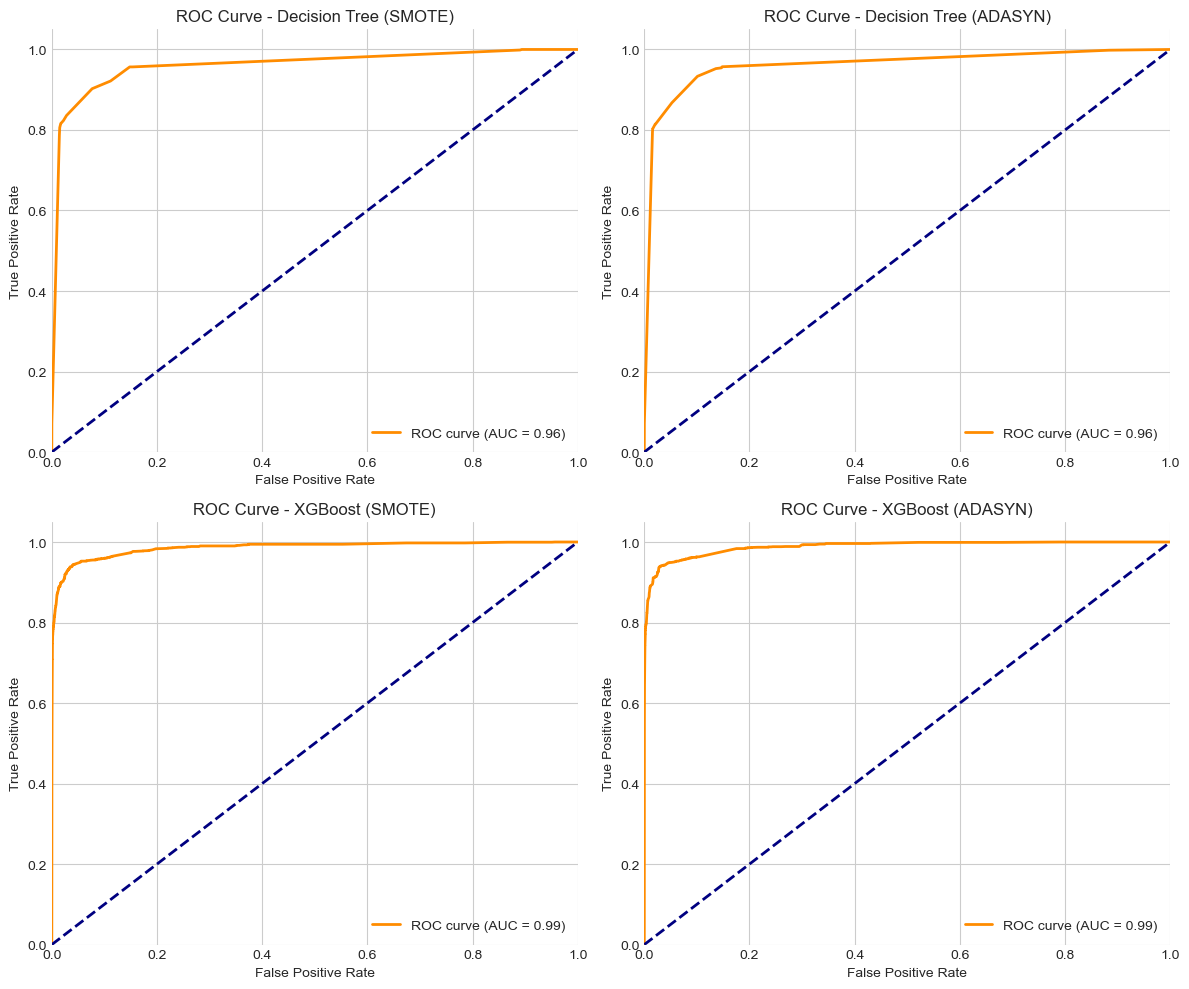

In [367]:
# Plotting ROC curves with AUC values for top 4 models
models = [dt_smote_model, dt_adasyn_model, xgb_smote_model, xgb_adasyn_model]
model_names = ['Decision Tree (SMOTE)', 'Decision Tree (ADASYN)', 'XGBoost (SMOTE)', 'XGBoost (ADASYN)']

plt.figure(figsize=(12, 10))
for i, model in enumerate(models, 1):
    test_predictions_proba = model.predict_proba(final_test_features)
    fpr, tpr, thresholds = roc_curve(test_target, test_predictions_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.subplot(2, 2, i)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + model_names[i-1])
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

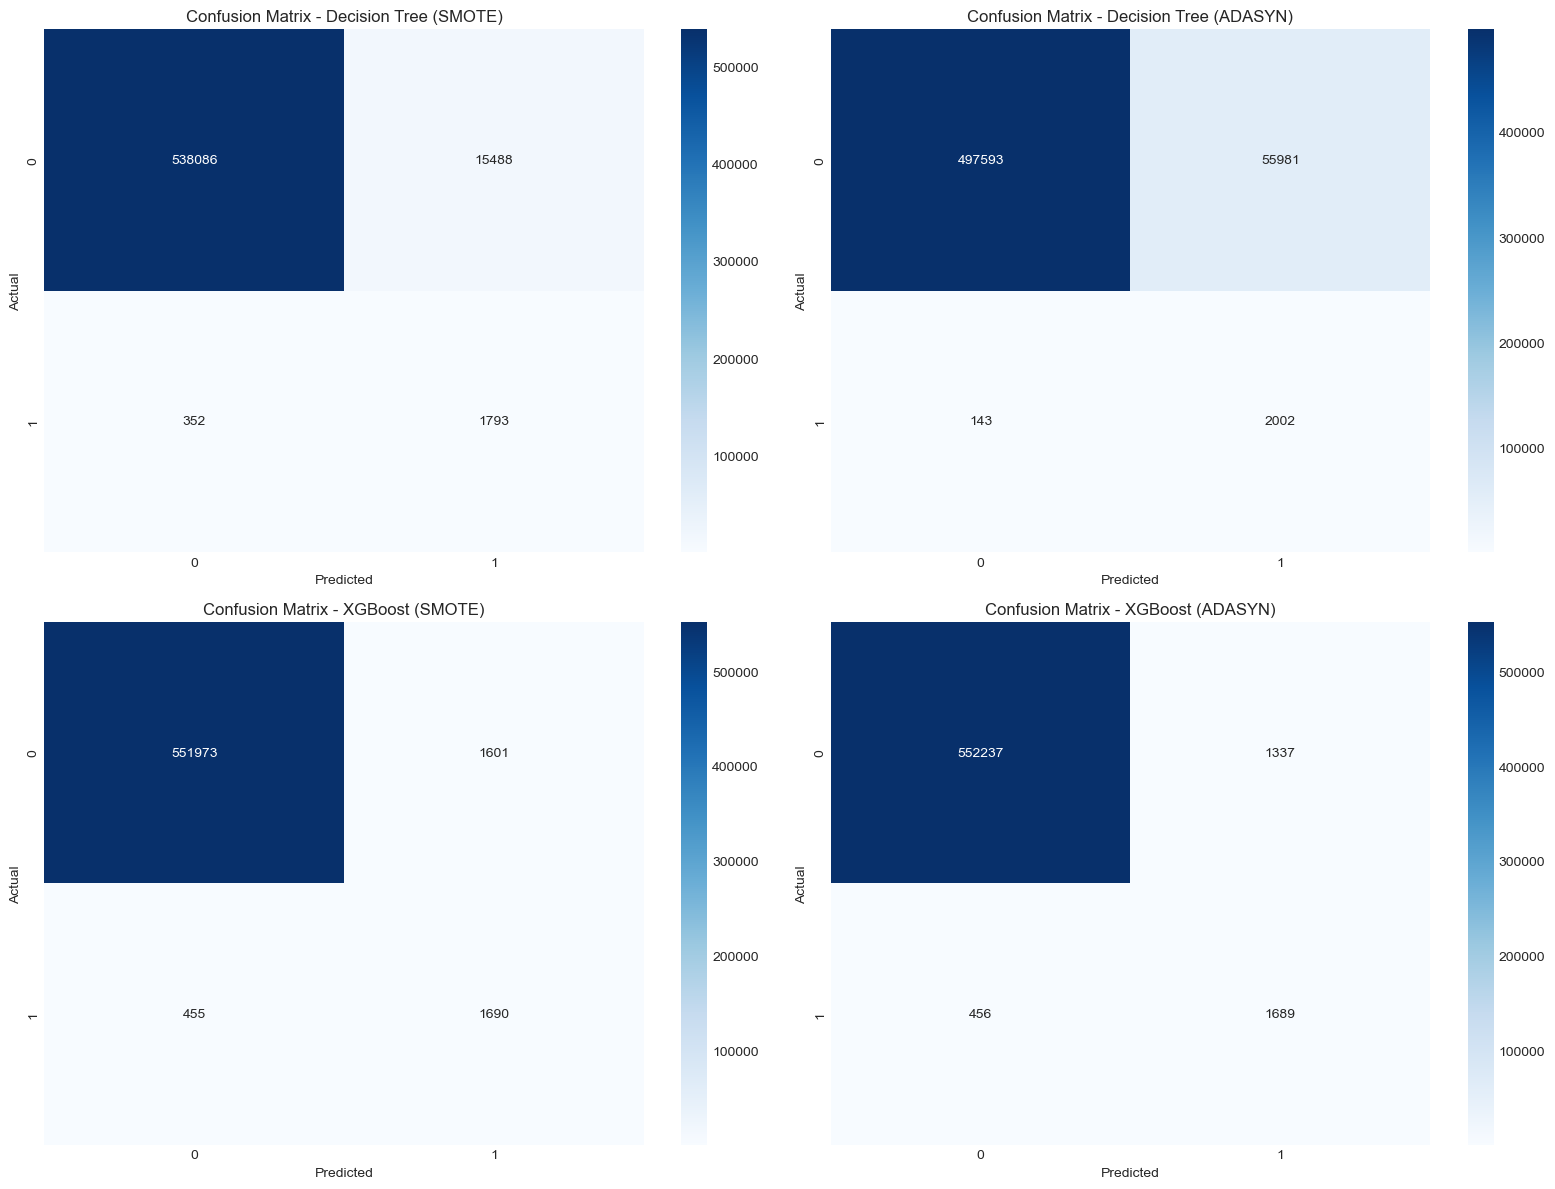

In [368]:
# Plotting Confusion Matrix for Top 4 Models
models = [dt_smote_model, dt_adasyn_model, xgb_smote_model, xgb_adasyn_model]
model_names = ['Decision Tree (SMOTE)', 'Decision Tree (ADASYN)', 'XGBoost (SMOTE)', 'XGBoost (ADASYN)']

plt.figure(figsize=(16, 12))
for i, model in enumerate(models, 1):
    test_predictions = model.predict(final_test_features)
    
    conf_matrix = confusion_matrix(test_target, test_predictions)

    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - ' + model_names[i-1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [369]:
print(metrics_df)

                                  Train                          Test
Model       Logistic Regression (SMOTE)   Logistic Regression (SMOTE)
Accuracy                       0.929380                      0.926778
Precision                      0.918752                      0.021809
Recall                         0.942073                      0.409790
F1 Score                       0.930265                      0.041414
Model      Logistic Regression (AdaSyn)  Logistic Regression (AdaSyn)
Accuracy                       0.917154                      0.901117
Precision                      0.896839                      0.015683
Recall                         0.942715                      0.398601
F1 Score                       0.919205                      0.030179
Model             Decision Tree (SMOTE)         Decision Tree (SMOTE)
Accuracy                       0.952210                      0.971496
Precision                      0.970316                      0.103756
Recall              

Among the four models showcasing top evaluation metrics, the goal is to enhance their performance through hyperparameter tuning. This process aims to optimize the model's parameters further, potentially improving its performance metrics. Exploring hyperparameter tuning can help assess if even better results can be achieved.

Among the models demonstrating top evaluation metrics, the focus shifts to optimizing four specific models through hyperparameter tuning:

* Model 3: Decision Tree (SMOTE)
* Model 4: Decision Tree (AdaSyn)
* Model 7: XGBoost (SMOTE)
* Model 8: XGBoost (AdaSyn)

Fine-tuning the hyperparameters of these models aims to further enhance their performance and potentially achieve superior results.

***Due to the time and memory consumption associated with running grid search for hyperparameter tuning, the following code, although effective, is being commented out. The best parameters obtained from this code will be utilized to tune the model.***

In [370]:
# Hyperparameter tuning for Decision Tree model (SMOTE) and evaluating its performance on the test data

# Ignoring FutureWarnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

#param_grid_dt_smote = {
    #'max_depth': [3, 5, 7, 9, 11],  
    #'min_samples_split': [2, 5, 10], 
    #'min_samples_leaf': [1, 2, 4]  
#}

# Initializing Decision Tree classifier
#base_dt_model_smote = DecisionTreeClassifier(random_state=42)

# Initializing GridSearchCV
#grid_search_dt_smote = GridSearchCV(estimator=base_dt_model_smote, param_grid=param_grid_dt_smote, 
                                  #cv=skf, scoring='recall', n_jobs=-1)

# Performing grid search
#grid_search_dt_smote.fit(x_train_resample_smote, y_train_resample_smote)

# Getting the best hyperparameters
#best_params_dt_smote = grid_search_dt_smote.best_params_
#print("Best Hyperparameters for Decision Tree (SMOTE):", best_params_dt_smote)

# Initializing Decision Tree model with the best hyperparameters
#best_dt_model_smote = DecisionTreeClassifier(**best_params_dt_smote, random_state=42)

# Training the model on the entire training data
#best_dt_model_smote.fit(x_train_resample_smote, y_train_resample_smote)

# Making predictions on the test data
#test_predictions_dt_smote = best_dt_model_smote.predict(final_test_features)

# Calculating evaluation metrics on the test data
#test_accuracy_dt_smote = accuracy_score(test_target, test_predictions_dt_smote)
#test_precision_dt_smote = precision_score(test_target, test_predictions_dt_smote)
#test_recall_dt_smote = recall_score(test_target, test_predictions_dt_smote)
#test_f1_score_dt_smote = f1_score(test_target, test_predictions_dt_smote)

# Printing evaluation metrics on the test data for the tuned Decision Tree model trained on SMOTE data
#print("Test Metrics for Decision Tree (SMOTE) with Best Hyperparameters:")
#print("Accuracy:", test_accuracy_dt_smote)
#print("Precision:", test_precision_dt_smote)
#print("Recall:", test_recall_dt_smote)
#print("F1 Score:", test_f1_score_dt_smote)

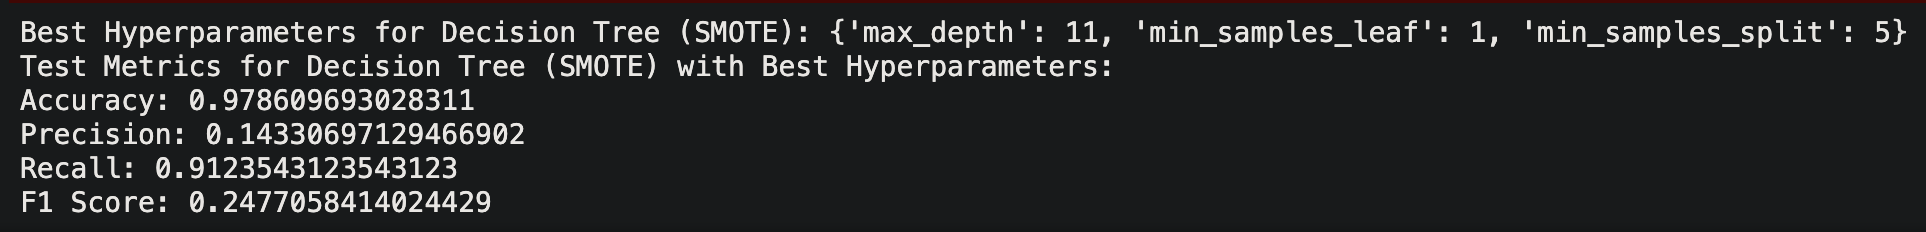

To avoid the time and memory consumption associated with running grid search for hyperparameter tuning, the best parameters obtained from the previous grid search are utilized. The code below makes predictions on the test data using these best hyperparameters and displays the evaluation metrics.

In [371]:
# Setting the best hyperparameters obtained using GridSearchCV
best_params_dt_smote = {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 5}

# Initializing Decision Tree model with the best hyperparameters
best_dt_model_smote = DecisionTreeClassifier(**best_params_dt_smote, random_state=42)

# Training the model on the entire SMOTE training data
best_dt_model_smote.fit(x_train_resample_smote, y_train_resample_smote)

# Making predictions on the test data
test_predictions_dt_smote = best_dt_model_smote.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_dt_smote = accuracy_score(test_target, test_predictions_dt_smote)
test_precision_dt_smote = precision_score(test_target, test_predictions_dt_smote)
test_recall_dt_smote = recall_score(test_target, test_predictions_dt_smote)
test_f1_score_dt_smote = f1_score(test_target, test_predictions_dt_smote)

# Printing evaluation metrics on the test data
print("Test Metrics for Decision Tree (SMOTE) with Best Hyperparameters:")
print("Accuracy:", test_accuracy_dt_smote)
print("Precision:", test_precision_dt_smote)
print("Recall:", test_recall_dt_smote)
print("F1 Score:", test_f1_score_dt_smote)

Test Metrics for Decision Tree (SMOTE) with Best Hyperparameters:
Accuracy: 0.978609693028311
Precision: 0.14330697129466902
Recall: 0.9123543123543123
F1 Score: 0.2477058414024429


In [372]:
# Creating a DataFrame to display the evaluation metrics of the hyperparameter tuned models on test data
print("\033[1mEvaluation metrics of the hyperparameter tuned models on test data:\033[0m")
print()

metrics_df_tuned = pd.DataFrame({
   'Model': ['Model 1 - Decision Tree (SMOTE)'],
   'Accuracy': [test_accuracy_dt_smote],
   'Precision': [test_precision_dt_smote],
   'Recall': [test_recall_dt_smote],
   'F1 Score': [test_f1_score_dt_smote]
})

print(metrics_df_tuned)

Evaluation metrics of the hyperparameter tuned models on test data:

                             Model  Accuracy  Precision   Recall  F1 Score
0  Model 1 - Decision Tree (SMOTE)  0.978610   0.143307 0.912354  0.247706


***Due to the time and memory consumption associated with running grid search for hyperparameter tuning, the following code, although effective, is being commented out. The best parameters obtained from this code will be utilized to tune the model.***

In [373]:
# Hyperparameter tuning for Decision Tree model (ADASYN) and evaluating its performance on the test data
# Ignoring FutureWarnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

#param_grid_dt_adasyn = {
    #'max_depth': [3, 5, 7, 9, 11],  
    #'min_samples_split': [2, 5, 10], 
    #'min_samples_leaf': [1, 2, 4]  
#}

# Initializing Decision Tree classifier
#base_dt_model_adasyn = DecisionTreeClassifier(random_state=42)

# Initializing GridSearchCV
#grid_search_dt_adasyn = GridSearchCV(estimator=base_dt_model_adasyn, param_grid=param_grid_dt_adasyn, 
                                  #cv=skf, scoring='recall', n_jobs=-1)

# Performing grid search
#grid_search_dt_adasyn.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Getting the best hyperparameters
#best_params_dt_adasyn = grid_search_dt_adasyn.best_params_
#print("Best Hyperparameters for Decision Tree (ADASYN):", best_params_dt_adasyn)

# Initializing Decision Tree model with the best hyperparameters
#best_dt_model_adasyn = DecisionTreeClassifier(**best_params_dt_adasyn, random_state=42)

# Training the model on the entire training data
#best_dt_model_adasyn.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Making predictions on the test data
#test_predictions_dt_adasyn = best_dt_model_adasyn.predict(final_test_features)

# Calculating evaluation metrics on the test data
#test_accuracy_dt_adasyn = accuracy_score(test_target, test_predictions_dt_adasyn)
#test_precision_dt_adasyn = precision_score(test_target, test_predictions_dt_adasyn)
#test_recall_dt_adasyn = recall_score(test_target, test_predictions_dt_adasyn)
#test_f1_score_dt_adasyn = f1_score(test_target, test_predictions_dt_adasyn)

# Printing evaluation metrics on the test data for the tuned Decision Tree model trained on ADASYN data
#print("Test Metrics for Decision Tree (ADASYN) with Best Hyperparameters:")
#print("Accuracy:", test_accuracy_dt_adasyn)
#print("Precision:", test_precision_dt_adasyn)
#print("Recall:", test_recall_dt_adasyn)
#print("F1 Score:", test_f1_score_dt_adasyn)

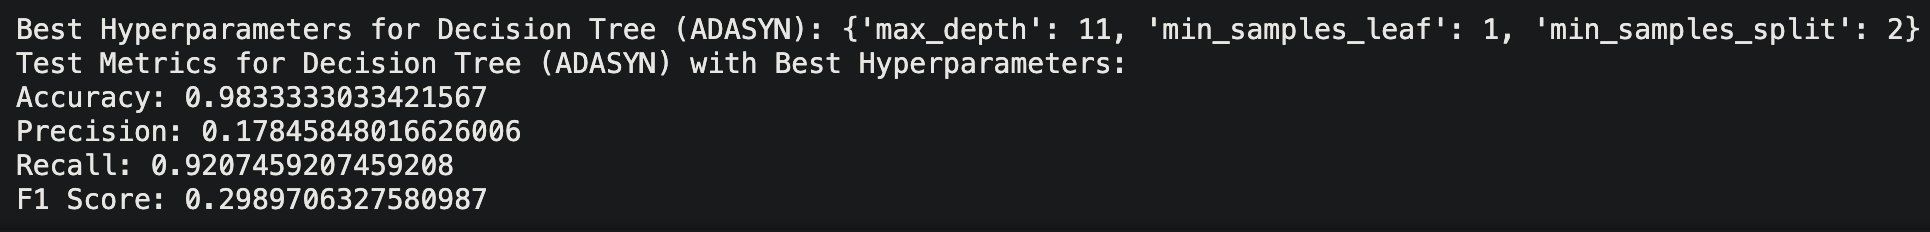

To avoid the time and memory consumption associated with running grid search for hyperparameter tuning, the best parameters obtained from the previous grid search are utilized. The code below makes predictions on the test data using these best hyperparameters and displays the evaluation metrics.

In [374]:
# Setting the best hyperparameters obtained using GridSearchCV
best_params_dt_adasyn = {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Initializing Decision Tree model with the best hyperparameters
best_dt_model_adasyn = DecisionTreeClassifier(**best_params_dt_adasyn, random_state=42)

# Training the model on the entire ADASYN training data
best_dt_model_adasyn.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Making predictions on the test data
test_predictions_dt_adasyn = best_dt_model_adasyn.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_dt_adasyn = accuracy_score(test_target, test_predictions_dt_adasyn)
test_precision_dt_adasyn = precision_score(test_target, test_predictions_dt_adasyn)
test_recall_dt_adasyn = recall_score(test_target, test_predictions_dt_adasyn)
test_f1_score_dt_adasyn = f1_score(test_target, test_predictions_dt_adasyn)

# Printing evaluation metrics on the test data
print("Test Metrics for Decision Tree (ADASYN) with Best Hyperparameters:")
print("Accuracy:", test_accuracy_dt_adasyn)
print("Precision:", test_precision_dt_adasyn)
print("Recall:", test_recall_dt_adasyn)
print("F1 Score:", test_f1_score_dt_adasyn)

Test Metrics for Decision Tree (ADASYN) with Best Hyperparameters:
Accuracy: 0.9833333033421567
Precision: 0.17845848016626006
Recall: 0.9207459207459208
F1 Score: 0.2989706327580987


In [375]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the hyperparameter tuned models on test data:\033[0m")
print()

metrics_df_adasyn = pd.DataFrame({
   'Model': ['Model 2 - Decision Tree (ADASYN)'],
   'Accuracy': [test_accuracy_dt_adasyn],
   'Precision': [test_precision_dt_adasyn],
   'Recall': [test_recall_dt_adasyn],
   'F1 Score': [test_f1_score_dt_adasyn]
})

metrics_df_tuned = pd.concat([metrics_df_tuned, metrics_df_adasyn], ignore_index=True)

print(metrics_df_tuned)

Evaluation metrics of the hyperparameter tuned models on test data:

                              Model  Accuracy  Precision   Recall  F1 Score
0   Model 1 - Decision Tree (SMOTE)  0.978610   0.143307 0.912354  0.247706
1  Model 2 - Decision Tree (ADASYN)  0.983333   0.178458 0.920746  0.298971


***Due to the time and memory consumption associated with running grid search for hyperparameter tuning, the following code, although effective, is being commented out. The best parameters obtained from this code will be utilized to tune the model.***

In [376]:
# Hyperparameter tuning for XGBoost model (SMOTE) and evaluating its performance on the test data
# Ignoring FutureWarnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

#param_grid_xgb_smote = {
    #'max_depth': [3, 5, 7],  # Varying max_depth
    #'n_estimators': [50, 100, 150],  # Varying n_estimators
    #'learning_rate': [0.1, 0.01]  # Varying learning rate
#}

# Initializing XGBoost classifier
#base_xgb_model_smote = XGBClassifier(random_state=42)

# Initializing GridSearchCV
#grid_search_xgb_smote = GridSearchCV(estimator=base_xgb_model_smote, param_grid=param_grid_xgb_smote,
                                     #cv=skf, scoring='recall', n_jobs=-1)

# Performing grid search
#grid_search_xgb_smote.fit(x_train_resample_smote, y_train_resample_smote)

# Getting the best hyperparameters
#best_params_xgb_smote = grid_search_xgb_smote.best_params_
#print("Best Hyperparameters for XGBoost (SMOTE):", best_params_xgb_smote)

# Initializing XGBoost model with the best hyperparameters
#best_xgb_model_smote = XGBClassifier(**best_params_xgb_smote, random_state=42)

# Training the model on the entire training data
#best_xgb_model_smote.fit(x_train_resample_smote, y_train_resample_smote)

# Making predictions on the test data
#test_predictions_xgb_smote = best_xgb_model_smote.predict(final_test_features)

# Calculating evaluation metrics on the test data
#test_accuracy_xgb_smote = accuracy_score(test_target, test_predictions_xgb_smote)
#test_precision_xgb_smote = precision_score(test_target, test_predictions_xgb_smote)
#test_recall_xgb_smote = recall_score(test_target, test_predictions_xgb_smote)
#test_f1_score_xgb_smote = f1_score(test_target, test_predictions_xgb_smote)

# Printing evaluation metrics on the test data for the tuned XGBoost model trained on SMOTE data
#print("Test Metrics for XGBoost (SMOTE) with Best Hyperparameters:")
#print("Accuracy:", test_accuracy_xgb_smote)
#print("Precision:", test_precision_xgb_smote)
#print("Recall:", test_recall_xgb_smote)
#print("F1 Score:", test_f1_score_xgb_smote)

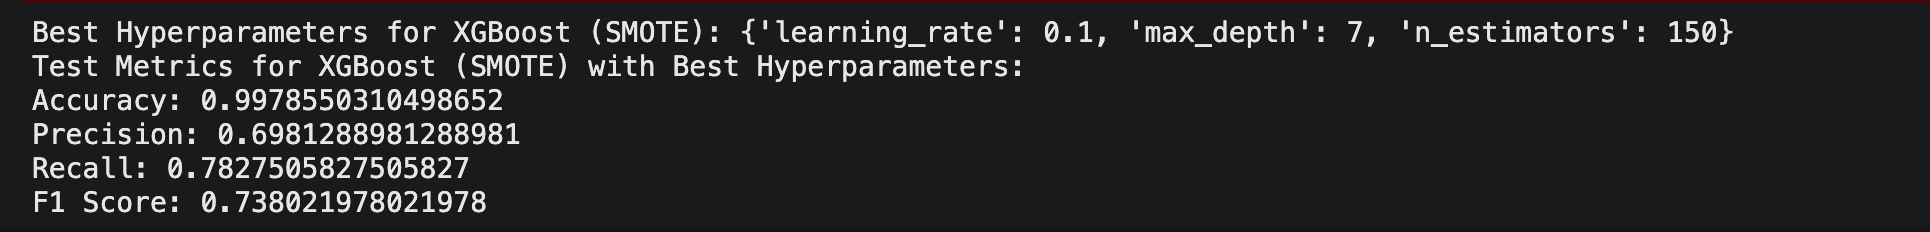

To avoid the time and memory consumption associated with running grid search for hyperparameter tuning, the best parameters obtained from the previous grid search are utilized. The code below makes predictions on the test data using these best hyperparameters and displays the evaluation metrics.

In [377]:
# Setting the best hyperparameters obtained using GridSearchCV
best_params_xgb_smote = {'max_depth': 7, 'n_estimators': 150, 'learning_rate': 0.1}

# Initializing XGBoost model with the best hyperparameters
best_xgb_model_smote = XGBClassifier(**best_params_xgb_smote, random_state=42)

# Training the model on the entire SMOTE training data
best_xgb_model_smote.fit(x_train_resample_smote, y_train_resample_smote)

# Making predictions on the test data
test_predictions_xgb_smote = best_xgb_model_smote.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_xgb_smote = accuracy_score(test_target, test_predictions_xgb_smote)
test_precision_xgb_smote = precision_score(test_target, test_predictions_xgb_smote)
test_recall_xgb_smote = recall_score(test_target, test_predictions_xgb_smote)
test_f1_score_xgb_smote = f1_score(test_target, test_predictions_xgb_smote)

# Printing evaluation metrics on the test data
print("Test Metrics for XGBoost (SMOTE) with Best Hyperparameters:")
print("Accuracy:", test_accuracy_xgb_smote)
print("Precision:", test_precision_xgb_smote)
print("Recall:", test_recall_xgb_smote)
print("F1 Score:", test_f1_score_xgb_smote)

Test Metrics for XGBoost (SMOTE) with Best Hyperparameters:
Accuracy: 0.9978550310498652
Precision: 0.6981288981288981
Recall: 0.7827505827505827
F1 Score: 0.738021978021978


In [378]:
# Adding evaluation metrics to the dataframe to facilitate easier comparison
print("\033[1mEvaluation metrics of the hyperparameter tuned models on test data:\033[0m")
print()

metrics_df_xgb_smote = pd.DataFrame({
   'Model': ['Model 3 - XGBoost (SMOTE)'],
   'Accuracy': [test_accuracy_xgb_smote],
   'Precision': [test_precision_xgb_smote],
   'Recall': [test_recall_xgb_smote],
   'F1 Score': [test_f1_score_xgb_smote]
})

# Concatenating the DataFrames
metrics_df_tuned = pd.concat([metrics_df_tuned, metrics_df_xgb_smote], ignore_index=True)

print(metrics_df_tuned)

Evaluation metrics of the hyperparameter tuned models on test data:

                              Model  Accuracy  Precision   Recall  F1 Score
0   Model 1 - Decision Tree (SMOTE)  0.978610   0.143307 0.912354  0.247706
1  Model 2 - Decision Tree (ADASYN)  0.983333   0.178458 0.920746  0.298971
2         Model 3 - XGBoost (SMOTE)  0.997855   0.698129 0.782751  0.738022


***Due to the time and memory consumption associated with running grid search for hyperparameter tuning, the following code, although effective, is being commented out. The best parameters obtained from this code will be utilized to tune the model.***

In [379]:
# Hyperparameter tuning for XGBoost model (ADASYN) and evaluating its performance on the test data
# Ignoring FutureWarnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

#param_grid_xgb_adasyn = {
    #'max_depth': [3, 5, 7],  # Varying max_depth
    #'n_estimators': [50, 100, 150],  # Varying n_estimators
    #'learning_rate': [0.1, 0.01]  # Varying learning rate
#}

# Initializing XGBoost classifier
#base_xgb_model_adasyn = XGBClassifier(random_state=42)

# Initializing GridSearchCV
#grid_search_xgb_adasyn = GridSearchCV(estimator=base_xgb_model_adasyn, param_grid=param_grid_xgb_adasyn,
                                      #cv=skf, scoring='recall', n_jobs=-1)

# Performing grid search
#grid_search_xgb_adasyn.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Getting the best hyperparameters
#best_params_xgb_adasyn = grid_search_xgb_adasyn.best_params_
#print("Best Hyperparameters for XGBoost (ADASYN):", best_params_xgb_adasyn)

# Initializing XGBoost model with the best hyperparameters
#best_xgb_model_adasyn = XGBClassifier(**best_params_xgb_adasyn, random_state=42)

# Training the model on the entire ADASYN training data
#best_xgb_model_adasyn.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Making predictions on the test data
#test_predictions_xgb_adasyn = best_xgb_model_adasyn.predict(final_test_features)

# Calculating evaluation metrics on the test data
#test_accuracy_xgb_adasyn = accuracy_score(test_target, test_predictions_xgb_adasyn)
#test_precision_xgb_adasyn = precision_score(test_target, test_predictions_xgb_adasyn)
#test_recall_xgb_adasyn = recall_score(test_target, test_predictions_xgb_adasyn)
#test_f1_score_xgb_adasyn = f1_score(test_target, test_predictions_xgb_adasyn)

# Printing evaluation metrics on the test data for the tuned XGBoost model trained on ADASYN data
#print("Test Metrics for XGBoost (ADASYN) with Best Hyperparameters:")
#print("Accuracy:", test_accuracy_xgb_adasyn)
#print("Precision:", test_precision_xgb_adasyn)
#print("Recall:", test_recall_xgb_adasyn)
#print("F1 Score:", test_f1_score_xgb_adasyn)

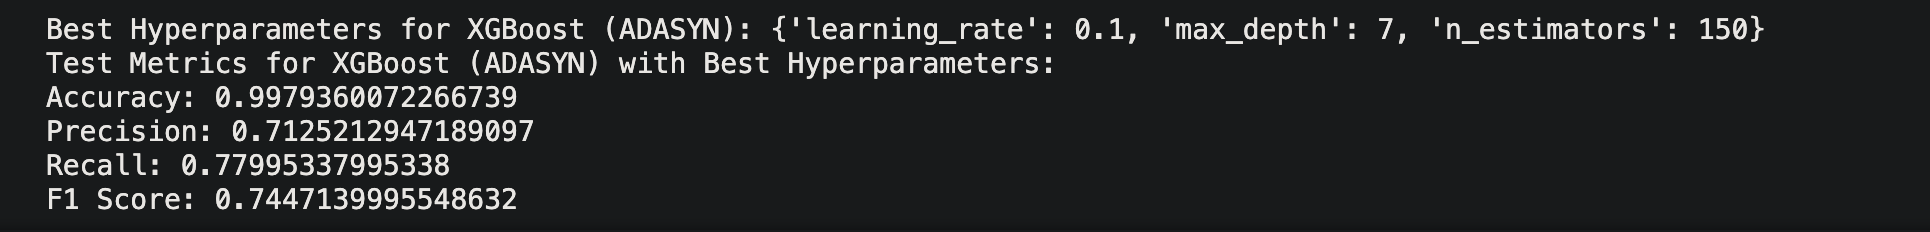

To avoid the time and memory consumption associated with running grid search for hyperparameter tuning, the best parameters obtained from the previous grid search are utilized. The code below makes predictions on the test data using these best hyperparameters and displays the evaluation metrics.

In [380]:
# Setting the best hyperparameters obtained using GridSearchCV
best_params_xgb_adasyn = {'max_depth': 7, 'n_estimators': 150, 'learning_rate': 0.1}

# Initializing XGBoost model with the best hyperparameters
best_xgb_model_adasyn = XGBClassifier(**best_params_xgb_adasyn, random_state=42)

# Training the model on the entire ADASYN training data
best_xgb_model_adasyn.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Making predictions on the test data
test_predictions_xgb_adasyn = best_xgb_model_adasyn.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy_xgb_adasyn = accuracy_score(test_target, test_predictions_xgb_adasyn)
test_precision_xgb_adasyn = precision_score(test_target, test_predictions_xgb_adasyn)
test_recall_xgb_adasyn = recall_score(test_target, test_predictions_xgb_adasyn)
test_f1_score_xgb_adasyn = f1_score(test_target, test_predictions_xgb_adasyn)

# Printing evaluation metrics on the test data
print("Test Metrics for XGBoost (ADASYN) with Best Hyperparameters:")
print("Accuracy:", test_accuracy_xgb_adasyn)
print("Precision:", test_precision_xgb_adasyn)
print("Recall:", test_recall_xgb_adasyn)
print("F1 Score:", test_f1_score_xgb_adasyn)

Test Metrics for XGBoost (ADASYN) with Best Hyperparameters:
Accuracy: 0.9979360072266739
Precision: 0.7125212947189097
Recall: 0.77995337995338
F1 Score: 0.7447139995548632


In [381]:
# Adding evaluation metrics for XGBoost with ADASYN data to the dataframe
print("\033[1mEvaluation metrics of the hyperparameter tuned models on test data:\033[0m")
print()

metrics_df_xgb_adasyn = pd.DataFrame({
   'Model': ['Model 4 - XGBoost (ADASYN)'],
   'Accuracy': [test_accuracy_xgb_adasyn],
   'Precision': [test_precision_xgb_adasyn],
   'Recall': [test_recall_xgb_adasyn],
   'F1 Score': [test_f1_score_xgb_adasyn]
})

metrics_df_tuned = pd.concat([metrics_df_tuned, metrics_df_xgb_adasyn], ignore_index=True)

print(metrics_df_tuned)

Evaluation metrics of the hyperparameter tuned models on test data:

                              Model  Accuracy  Precision   Recall  F1 Score
0   Model 1 - Decision Tree (SMOTE)  0.978610   0.143307 0.912354  0.247706
1  Model 2 - Decision Tree (ADASYN)  0.983333   0.178458 0.920746  0.298971
2         Model 3 - XGBoost (SMOTE)  0.997855   0.698129 0.782751  0.738022
3        Model 4 - XGBoost (ADASYN)  0.997936   0.712521 0.779953  0.744714


Model 4 - XGBoost (ADASYN) demonstrates stability and balance, with notably high values for both recall and precision. Further enhancing the recall might be explored through threshold adjustment.

In [382]:
# Hyperparameter Tuning with Threshold Adjustment (Threshold = 0.40)

# Setting the best hyperparameters obtained
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

# Initializing XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params, random_state=42)

# Setting the threshold
threshold = 0.40

# Training the model on the entire training data
best_xgb_model.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Making predictions on the test data
test_predictions_prob = best_xgb_model.predict_proba(final_test_features)[:, 1]
test_predictions_adjusted = (test_predictions_prob > threshold).astype(int)

# Calculating evaluation metrics on the test data
test_accuracy = accuracy_score(test_target, test_predictions_adjusted)
test_precision = precision_score(test_target, test_predictions_adjusted)
test_recall = recall_score(test_target, test_predictions_adjusted)
test_f1_score = f1_score(test_target, test_predictions_adjusted)

# Printing evaluation metrics on the test data
print("Test Metrics for XGBoost (ADASYN) with Threshold Adjustment(0.40):")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)

Test Metrics for XGBoost (ADASYN) with Threshold Adjustment(0.40):
Accuracy: 0.997415960224502
Precision: 0.628581791802684
Recall: 0.8079254079254079
F1 Score: 0.7070583435332517


In [383]:
# Adding evaluation metrics for XGBoost with threshold adjustment to the dataframe
print("\033[1mEvaluation metrics of the hyperparameter tuned models on test data:\033[0m")
print()

metrics_df_threshold_40 = pd.DataFrame({
   'Model': ['Model 5 - XGBoost (ADASYN)_0.40'],
   'Accuracy': [test_accuracy],
   'Precision': [test_precision],
   'Recall': [test_recall],
   'F1 Score': [test_f1_score]
})

metrics_df_tuned = pd.concat([metrics_df_tuned, metrics_df_threshold_40], ignore_index=True)

print(metrics_df_tuned)

Evaluation metrics of the hyperparameter tuned models on test data:

                              Model  Accuracy  Precision   Recall  F1 Score
0   Model 1 - Decision Tree (SMOTE)  0.978610   0.143307 0.912354  0.247706
1  Model 2 - Decision Tree (ADASYN)  0.983333   0.178458 0.920746  0.298971
2         Model 3 - XGBoost (SMOTE)  0.997855   0.698129 0.782751  0.738022
3        Model 4 - XGBoost (ADASYN)  0.997936   0.712521 0.779953  0.744714
4   Model 5 - XGBoost (ADASYN)_0.40  0.997416   0.628582 0.807925  0.707058


In [384]:
# Hyperparameter Tuning with Threshold Adjustment (Threshold = 0.15)

# Setting the best hyperparameters obtained
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

# Initializing XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params, random_state=42)

# Setting the threshold
threshold = 0.15

# Training the model on the entire training data
best_xgb_model.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Making predictions on the test data
test_predictions_prob = best_xgb_model.predict_proba(final_test_features)[:, 1]
test_predictions_adjusted = (test_predictions_prob > threshold).astype(int)

# Calculating evaluation metrics on the test data
test_accuracy = accuracy_score(test_target, test_predictions_adjusted)
test_precision = precision_score(test_target, test_predictions_adjusted)
test_recall = recall_score(test_target, test_predictions_adjusted)
test_f1_score = f1_score(test_target, test_predictions_adjusted)

# Printing evaluation metrics on the test data
print("Test Metrics for XGBoost (ADASYN) with Threshold Adjustment(0.15):")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)

Test Metrics for XGBoost (ADASYN) with Threshold Adjustment(0.15):
Accuracy: 0.9868260757685089
Precision: 0.21597892888498682
Recall: 0.9174825174825175
F1 Score: 0.34964910722217285


In [385]:
# Adding evaluation metrics for XGBoost with threshold adjustment (Threshold = 0.15) to the dataframe
print("\033[1mEvaluation metrics of the hyperparameter tuned models on test data:\033[0m")
print()

metrics_df_threshold_15 = pd.DataFrame({
   'Model': ['Model 6 - XGBoost (ADASYN)_0.15'],
   'Accuracy': [test_accuracy],
   'Precision': [test_precision],
   'Recall': [test_recall],
   'F1 Score': [test_f1_score]
})

metrics_df_tuned = pd.concat([metrics_df_tuned, metrics_df_threshold_15], ignore_index=True)

print(metrics_df_tuned)

Evaluation metrics of the hyperparameter tuned models on test data:

                              Model  Accuracy  Precision   Recall  F1 Score
0   Model 1 - Decision Tree (SMOTE)  0.978610   0.143307 0.912354  0.247706
1  Model 2 - Decision Tree (ADASYN)  0.983333   0.178458 0.920746  0.298971
2         Model 3 - XGBoost (SMOTE)  0.997855   0.698129 0.782751  0.738022
3        Model 4 - XGBoost (ADASYN)  0.997936   0.712521 0.779953  0.744714
4   Model 5 - XGBoost (ADASYN)_0.40  0.997416   0.628582 0.807925  0.707058
5   Model 6 - XGBoost (ADASYN)_0.15  0.986826   0.215979 0.917483  0.349649


Attempting Cost-Sensitive learning by introducing weighted misclassification costs during model training. This approach assigns higher weightage to misclassifying fraudulent transactions compared to misclassifying legitimate transactions, prioritizing the detection of more fraudulent activities.

In [386]:
# Hyperparameter Tuning with increased penalty for misclassifications

# Calculating the ratio of negative to positive samples in the training data
neg_to_pos_ratio = (y_train_resample_adasyn == 0).sum() / (y_train_resample_adasyn == 1).sum()

# Increasing the penalty for misclassifying positive instances to prioritize recall
scale_pos_weight = 10.0 

# Setting the best hyperparameters obtained
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

# Initializing XGBoost model with the best hyperparameters and scale_pos_weight
best_xgb_model = XGBClassifier(objective='binary:logistic', scale_pos_weight=scale_pos_weight,
                               **best_params, random_state=42)

# Training the model on the entire training data
best_xgb_model.fit(x_train_resample_adasyn, y_train_resample_adasyn)

# Making predictions on the test data
test_predictions = best_xgb_model.predict(final_test_features)

# Calculating evaluation metrics on the test data
test_accuracy = accuracy_score(test_target, test_predictions)
test_precision = precision_score(test_target, test_predictions)
test_recall = recall_score(test_target, test_predictions)
test_f1_score = f1_score(test_target, test_predictions)

# Printing evaluation metrics on the test data
print("Test Metrics for XGBoost (ADASYN) with Increased Penalty for Misclassifications:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)

Test Metrics for XGBoost (ADASYN) with Increased Penalty for Misclassifications:
Accuracy: 0.9855124622336109
Precision: 0.2011738514470755
Recall: 0.9268065268065268
F1 Score: 0.3305895069427122


In [387]:
# Adding evaluation metrics for XGBoost with increased penalty for misclassifications to the dataframe
print("\033[1mEvaluation metrics of the hyperparameter tuned models on test data:\033[0m")
print()

metrics_df_penalty_adjusted = pd.DataFrame({
   'Model': ['Model 7 - XGBoost (ADASYN)_Penalty'],
   'Accuracy': [test_accuracy],
   'Precision': [test_precision],
   'Recall': [test_recall],
   'F1 Score': [test_f1_score]
})

metrics_df_tuned = pd.concat([metrics_df_tuned, metrics_df_penalty_adjusted], ignore_index=True)

print(metrics_df_tuned)

Evaluation metrics of the hyperparameter tuned models on test data:

                                Model  Accuracy  Precision   Recall  F1 Score
0     Model 1 - Decision Tree (SMOTE)  0.978610   0.143307 0.912354  0.247706
1    Model 2 - Decision Tree (ADASYN)  0.983333   0.178458 0.920746  0.298971
2           Model 3 - XGBoost (SMOTE)  0.997855   0.698129 0.782751  0.738022
3          Model 4 - XGBoost (ADASYN)  0.997936   0.712521 0.779953  0.744714
4     Model 5 - XGBoost (ADASYN)_0.40  0.997416   0.628582 0.807925  0.707058
5     Model 6 - XGBoost (ADASYN)_0.15  0.986826   0.215979 0.917483  0.349649
6  Model 7 - XGBoost (ADASYN)_Penalty  0.985512   0.201174 0.926807  0.330590


* Among the hyperparameter tuned models, Model 7 - XGBoost (ADASYN) with Increased Penalty exhibits the highest recall value of 0.926807.
* This high recall signifies the model's effectiveness in identifying a significant portion of fraudulent transactions.
* Model 2 - Decision Tree (ADASYN) closely follows with a recall of 0.920746, though with a slightly lower precision of 0.178458.

 __Comparatively, Model 7 - XGBoost (ADASYN) demonstrates superior recall along with corresponding precision, establishing it as the optimal choice for addressing this credit card fraud detection challenge.__

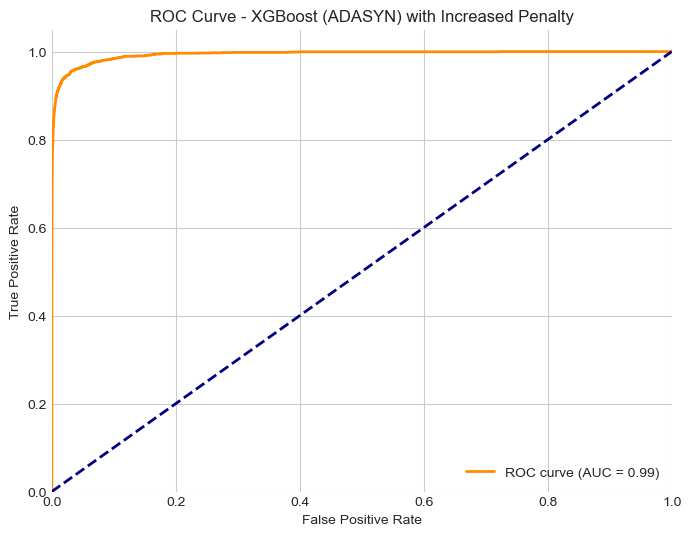

In [388]:
# Plotting ROC curve with AUC value for the best model(Model 7 - XGBoost (ADASYN) with increased penalty)
test_predictions_prob = best_xgb_model.predict_proba(final_test_features)[:, 1]

fpr, tpr, thresholds = roc_curve(test_target, test_predictions_prob)

roc_auc = roc_auc_score(test_target, test_predictions_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (ADASYN) with Increased Penalty')
plt.legend(loc="lower right")
plt.show()

An AUC (Area Under the Curve) value of 99%  indicates that the model is performing exceptionally well in classifying instances, with minimal misclassifications.

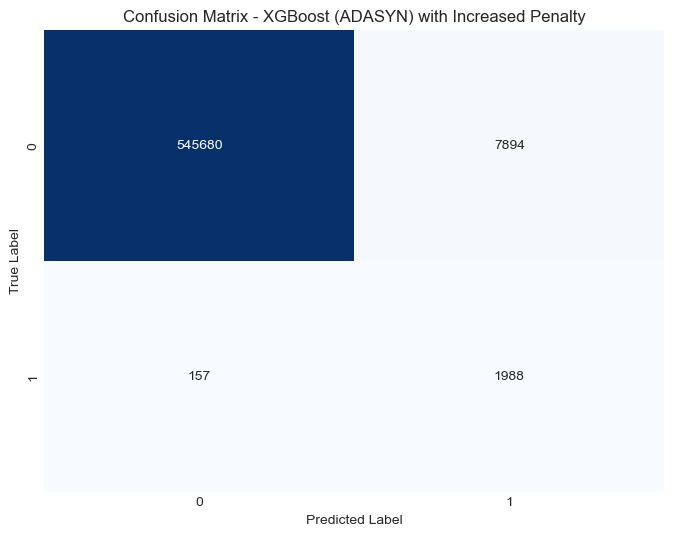

In [389]:
# Plotting Confusion Matrix for the best model(Model 7 - XGBoost (ADASYN) with increased penalty)
conf_matrix = confusion_matrix(test_target, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost (ADASYN) with Increased Penalty')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

It appears that the model demonstrates good performance in identifying fraudulent transactions, with very few instances of missed detections of actual fraudulent transactions.

## Business Impact (Cost-Benefit Analysis)

The analysis compares costs before and after deploying the model. Previously, the bank incurred losses by reimbursing customers for every fraudulent transaction.

With the model, the bank will add a second layer of authentication for flagged transactions. This includes sending an SMS to customers, prompting them to confirm the transaction's authenticity via a toll-free call. Additionally, a customer experience executive will address any concerns. Implementing this service costs the bank $1.5 per fraudulent transaction.

For fraudulent transactions missed by the model, the bank will continue to reimburse customers as before.

Therefore, current costs include undetected fraudulent transactions and the expense of implementing the second layer of authentication. The total savings for the bank will be the difference in costs before and after deploying the model.

### Proposed Approach for Cost-Benefit Analysis

Part I: Analyse the dataset and find the following figures:

* Determine the average number of transactions per month. (a)
* Calculate the average number of fraudulent transactions per month. (b)
* Find the average amount per fraudulent transaction. (c)

Part II: Compare the cost incurred per month by the bank before and after the model deployment:
1. Calculate the cost incurred per month before the model was deployed: _(b * c)_
2. Determine the average number of transactions per month detected as fraudulent by the model _(TF)_
3. Define the cost of providing customer executive support per fraudulent transaction detected by the model _(1.5)_
4. Calculate the total cost of providing customer support per month for fraudulent transactions detected by the model: _(TF * 1.5)_
5. Determine the average number of transactions per month that are fraudulent but not detected by the model _(FN)_
6. Calculate the cost incurred due to fraudulent transactions left undetected by the model: _(FN * C)_
7. Calculate the cost incurred per month after the model is built and deployed: _(4 + 6)_
8. Compute the final savings by subtracting the cost incurred after deployment from the cost incurred before deployment:_(1 - 7)_

In [390]:
# Reading the training dataset from a CSV file named "fraudTest.csv"
df_train_original = pd.read_csv("fraudTrain.csv")

# Reading the testing dataset from a CSV file named "fraudTest.csv"
df_test_original = pd.read_csv("fraudTest.csv")

# Combining both training and testing datasets
df_combined = pd.concat([df_train_original, df_test_original], ignore_index=True)

In [391]:
# Converting the 'trans_date_trans_time' column in the DataFrame to datetime format
df_combined['trans_date_trans_time'] = pd.to_datetime(df_combined['trans_date_trans_time'])

# Extracting month and year from 'trans_date_trans_time'
df_combined['month'] = df_combined['trans_date_trans_time'].dt.month
df_combined['year'] = df_combined['trans_date_trans_time'].dt.year

# Calculating the number of unique months covered
unique_months = df_combined.groupby(['year', 'month']).size().reset_index(name='count')
total_months_covered_combined = len(unique_months)

print("Total number of months covered in the combined dataset:", total_months_covered_combined)

Total number of months covered in the combined dataset: 24


In [392]:
# Converting 'trans_date_trans_time' column to datetime format in the df_test_original dataset.
df_test_original['trans_date_trans_time'] = pd.to_datetime(df_test_original['trans_date_trans_time'])

# Extracting month and year from 'trans_date_trans_time'
df_test_original['month'] = df_test_original['trans_date_trans_time'].dt.month
df_test_original['year'] = df_test_original['trans_date_trans_time'].dt.year

##### Average number of transactions per month

In [393]:
# Calculating the total number of transactions
total_transactions = len(df_combined)

# Calculating the average number of transactions per month
average_transactions_per_month = total_transactions / total_months_covered_combined
a = average_transactions_per_month

print("Average number of transactions per month:", average_transactions_per_month)

Average number of transactions per month: 77183.08333333333


##### Average number of fraudulent transactions per month

In [394]:
# Calculating the total number of fraudulent transactions
total_fraudulent_transactions = df_combined['is_fraud'].sum()

# Calculating the average number of fraudulent transactions per month
average_fraudulent_transactions_per_month = total_fraudulent_transactions / total_months_covered_combined

print("Average number of fraudulent transactions per month:", average_fraudulent_transactions_per_month)

Average number of fraudulent transactions per month: 402.125


##### Average amount per fraudulent transaction

In [395]:
# Calculating the total amount of fraudulent transactions
total_fraudulent_amount = df_combined[df_combined['is_fraud'] == 1]['amt'].sum()

# Calculating the total number of fraudulent transactions
total_fraudulent_transactions = df_combined['is_fraud'].sum()

# Calculating the average amount per fraudulent transaction
average_amount_per_fraudulent_transaction = total_fraudulent_amount / total_fraudulent_transactions

print("Average amount per fraudulent transaction:", average_amount_per_fraudulent_transaction)

Average amount per fraudulent transaction: 530.661412288882


##### Cost incurred per month before the model was deployed (b*c)

In [396]:
# Calculating cost incurred per month before the model was deployed
cost_before_deployment_per_month = average_fraudulent_transactions_per_month * average_amount_per_fraudulent_transaction

print("Cost incurred per month before the model was deployed: ",cost_before_deployment_per_month)

Cost incurred per month before the model was deployed:  213392.2204166667


##### Average number of transactions per month detected as fraudulent by the model (TF)

In [397]:
# Using the trained model to predict fraudulent transactions on the test dataset
test_predictions = best_xgb_model.predict(final_test_features)

In [398]:
# Combining the predicted probabilities with the test data
df_test_original['predicted_fraud'] = test_predictions

# Grouping by month and sum the predicted probabilities to count the number of transactions predicted as fraudulent for each month
fraudulent_transactions_per_month = df_test_original.groupby(['year', 'month'])['predicted_fraud'].sum()

# Calculating the total number of months covered by the test data
total_months_covered_test = len(df_test_original.groupby(['year', 'month']))

# Calculating the total number of fraudulent transactions detected by the model across all months
total_fraudulent_transactions = fraudulent_transactions_per_month.sum()

# Calculating TF (average number of transactions per month detected as fraudulent by the model)
TF = total_fraudulent_transactions / total_months_covered_test

print("Average number of transactions per month detected as fraudulent by the model (TF):", TF)

Average number of transactions per month detected as fraudulent by the model (TF): 1411.7142857142858


Cost of providing customer executive support per fraudulent transaction detected by the model = $ 1.5

##### Total cost of providing customer support per month for fraudulent transactions detected by the model  (TF * $1.5)

In [399]:
# Calculating total cost of providing customer support per month for fraudulent transactions detected by the model
cost_cx_support_per_month = TF * 1.5

print("Total cost of providing customer support per month for fraudulent transactions detected by the model:",cost_cx_support_per_month )

Total cost of providing customer support per month for fraudulent transactions detected by the model: 2117.5714285714284


##### Average number of transactions per month that are fraudulent but not detected by the model (FN)

In [400]:
# Filtering the dataset to extract rows representing actual fraudulent transactions
actual_fraudulent_transactions = df_test_original[df_test_original['is_fraud'] == 1]

# Counting the total number of fraudulent transactions in the dataset
total_actual_fraudulent_transactions = len(actual_fraudulent_transactions)

# Counting the number of transactions predicted as fraudulent by the model
total_predicted_fraudulent_transactions = df_test_original['predicted_fraud'].sum()

# Counting the number of transactions actually fraudulent but not predicted as fraudulent by the model
false_negatives = len(actual_fraudulent_transactions[actual_fraudulent_transactions['predicted_fraud'] == 0])

# Calculating the average number of false negatives per month
FN = false_negatives / total_months_covered_test

print("Average number of transactions per month that are fraudulent but not detected by the model (FN):", FN)

Average number of transactions per month that are fraudulent but not detected by the model (FN): 22.428571428571427


##### Cost incurred due to fraudulent transactions left undetected by the model (FN * c)

In [401]:
# Calculating the cost incurred due to fraudulent transactions left undetected by the model
cost_untreated_fraudulent = FN * average_amount_per_fraudulent_transaction

print("Cost incurred due to fraudulent transactions left undetected by the model:",cost_untreated_fraudulent )

Cost incurred due to fraudulent transactions left undetected by the model: 11901.977389907783


##### Cost incurred per month after the model is built and deployed (4 + 6)

In [402]:
# Calculating the cost incurred per month after the model is built and deployed
cost_after_model = cost_cx_support_per_month + cost_untreated_fraudulent

print("Cost incurred per month after the model is built and deployed :",cost_after_model )

Cost incurred per month after the model is built and deployed : 14019.548818479212


##### Final savings = Cost incurred before - Cost incurred after (1 - 7)

In [405]:
# Calculating the final savings
final_savings = cost_before_deployment_per_month - cost_after_model

print("Final savings = Cost incurred before - Cost incurred after(1-7):",final_savings)

Final savings = Cost incurred before - Cost incurred after(1-7): 199372.6715981875


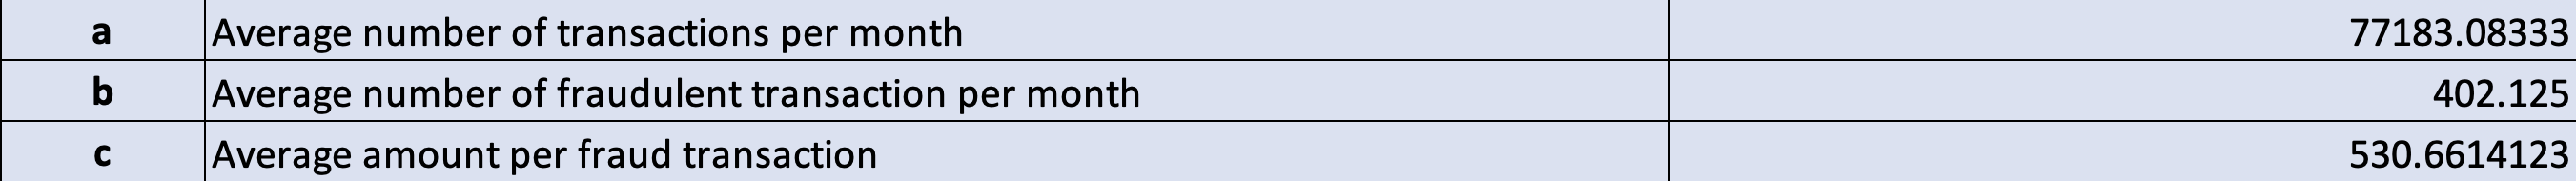

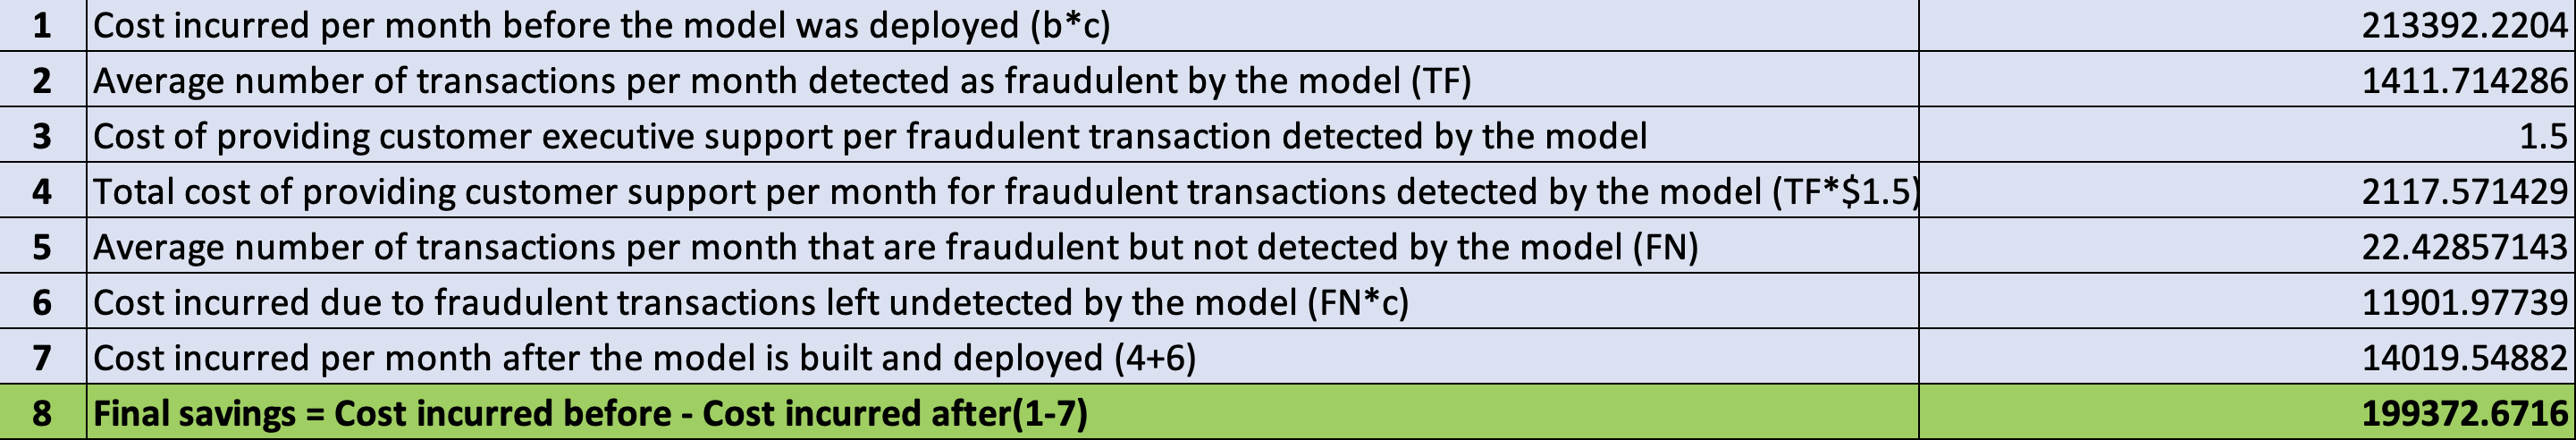

**Summary of Cost Benefit Analysis:**
- The cost incurred per month before deploying the model was significantly higher at 213,392.22.
- After deploying the model, the monthly cost reduced drastically to 14,019.55.
- The final savings per month achieved after deploying the model amounted to 199,372.67.


This indicates a significant reduction in costs by deploying the credit card fraud detection model. Specifically, there was a reduction of approximately **93.43%** in monthly expenses. This substantial decrease demonstrates the effectiveness of the model in mitigating losses associated with fraudulent transactions and highlights its value in improving the bank's financial security.